# Statistical Modelling

---

# 1. Finding the best model

### 1.1. Tranforming and cleaning the data

In [ ]:
# transform the data, if needed, and identify leverage cases, outliers, influential cases

#### Read and visually inspect the data.

In [1]:
data <- read.csv(file="A2_39.csv")


In [2]:
str(data)
head(data)
summary(data)

'data.frame':	300 obs. of  7 variables:
 $ y : num  16.4 16.1 12.6 16.4 16.2 ...
 $ x1: num  0.771 0.659 0.772 0.605 0.7 ...
 $ x2: num  2.02 2.14 2.11 2.02 1.99 ...
 $ x3: num  2.405 0.868 0.625 0.587 0.476 ...
 $ x4: num  1.98 1.69 2.07 2 2 ...
 $ x5: num  1.29 1.32 1 1.49 1.58 ...
 $ x6: num  1.78 1.75 1.26 2.52 2.12 ...


y,x1,x2,x3,x4,x5,x6
16.35217,0.7707179,2.021786,2.4046025,1.976686,1.286955,1.782570
16.14298,0.6588100,2.137674,0.8680835,1.694605,1.317277,1.752476
12.64773,0.7724474,2.107990,0.6254947,2.074029,1.000000,1.259103
16.41716,0.6048824,2.019045,0.5870236,2.003035,1.493922,2.521147
16.20737,0.6998877,1.985640,0.4761996,1.995250,1.579013,2.124690
15.65402,0.6240533,2.099477,0.5219989,1.785108,1.002227,2.720220


       y               x1               x2              x3        
 Min.   :11.60   Min.   :0.1843   Min.   :1.005   Min.   :0.2082  
 1st Qu.:18.36   1st Qu.:0.2809   1st Qu.:1.470   1st Qu.:0.2691  
 Median :21.62   Median :0.3651   Median :1.705   Median :0.3288  
 Mean   :21.59   Mean   :0.4048   Mean   :1.671   Mean   :0.3840  
 3rd Qu.:24.59   3rd Qu.:0.4845   3rd Qu.:1.894   3rd Qu.:0.4523  
 Max.   :32.61   Max.   :1.0000   Max.   :2.138   Max.   :2.4046  
       x4              x5              x6        
 Min.   :1.000   Min.   :1.000   Min.   :0.4399  
 1st Qu.:1.519   1st Qu.:2.040   1st Qu.:2.2655  
 Median :1.695   Median :2.824   Median :2.7978  
 Mean   :1.666   Mean   :2.839   Mean   :2.8331  
 3rd Qu.:1.835   3rd Qu.:3.580   3rd Qu.:3.4173  
 Max.   :2.285   Max.   :5.397   Max.   :4.7541  

In [3]:
# a function that computes correlations

panel.cor = function(x, y, ...)
{
  par(usr = c(0, 1, 0, 1))
  txt = as.character(format(cor(x, y), digits=2))
  text(0.5, 0.5, txt, cex=1.5)
}

#### Raw data analysis

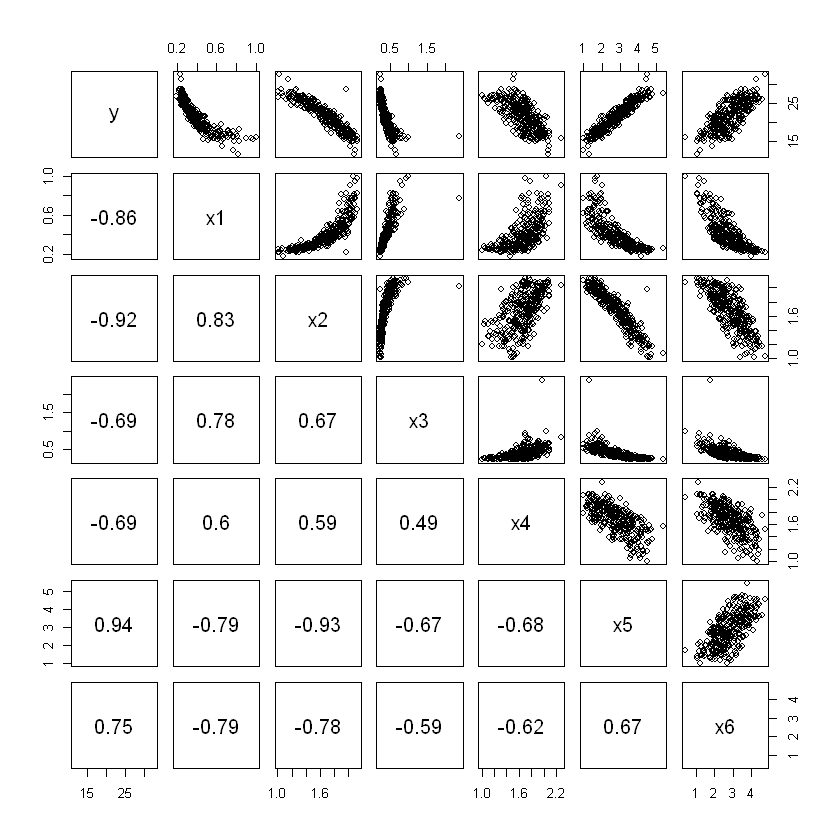

In [4]:
options(repr.plot.width=7, repr.plot.height=7)

pairs(y ~ x1 + x2 + x3 + x4 + x5 + x6, data = data,  
      lower.panel=panel.cor, 
      cex.labels=1.5
)

In [5]:
model = lm(y ~ x1 + x2 + x3 + x4 + x5 + x6, data = data) 
summary(model)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5 + x6, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9228 -0.6458  0.0883  0.5704  4.3479 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.9952     2.4887   7.633 3.26e-13 ***
x1           -6.2083     0.8193  -7.578 4.65e-13 ***
x2           -1.2040     0.7596  -1.585   0.1141    
x3            0.6010     0.4927   1.220   0.2235    
x4           -0.6016     0.3870  -1.554   0.1212    
x5            2.4436     0.2099  11.642  < 2e-16 ***
x6            0.3363     0.1443   2.331   0.0204 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9737 on 293 degrees of freedom
Multiple R-squared:  0.9346,	Adjusted R-squared:  0.9333 
F-statistic: 698.3 on 6 and 293 DF,  p-value: < 2.2e-16


In [6]:
 # a short-cut function for a residual plot with a trend line
 resplot = function(x, y, xlab, ylab)
 {
   plot(x, y, 
        main=paste(ylab, " vs ", xlab),  # title
        xlab=xlab, ylab=ylab,            # x and y labels
        cex.main=1, font.main=1,         # adjust font sizes
   )
   new.x = seq(min(x), max(x), length.out=50)
   lines(new.x, predict(loess(y~x), newdata=data.frame(x=new.x)), col=2, lwd=2) # add trendline
 } 

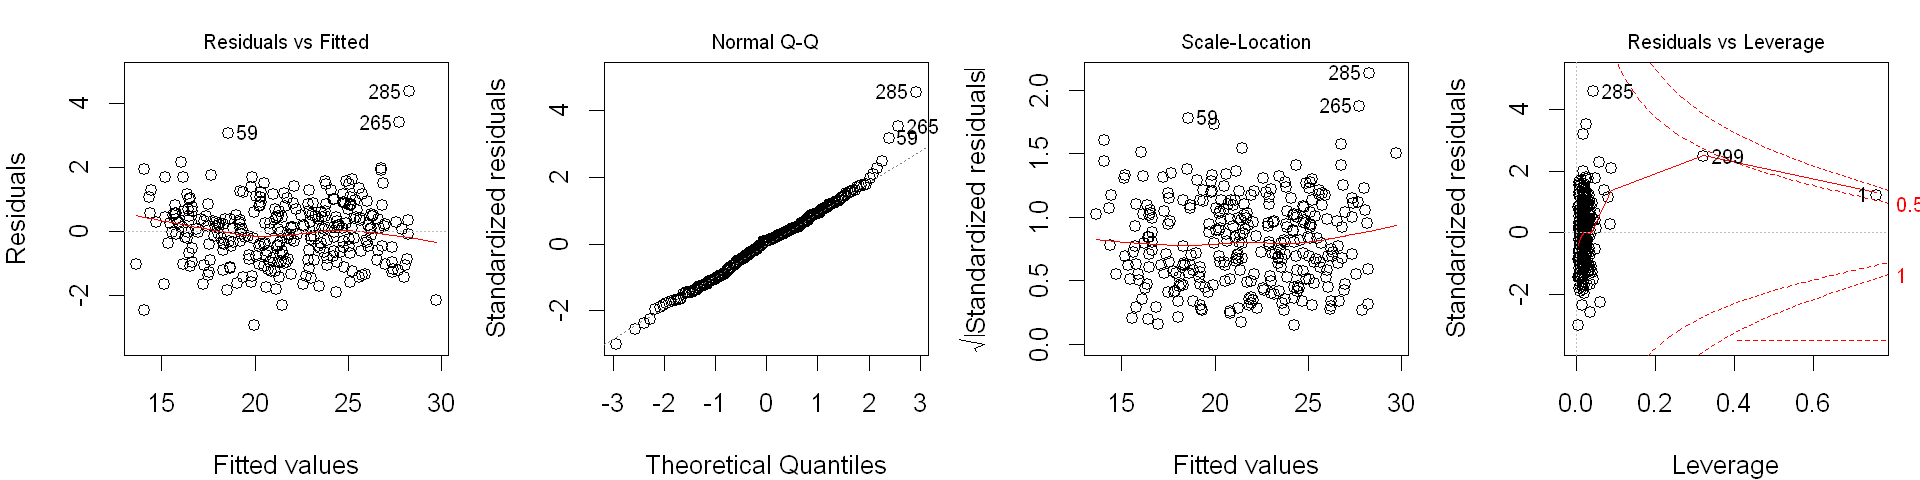

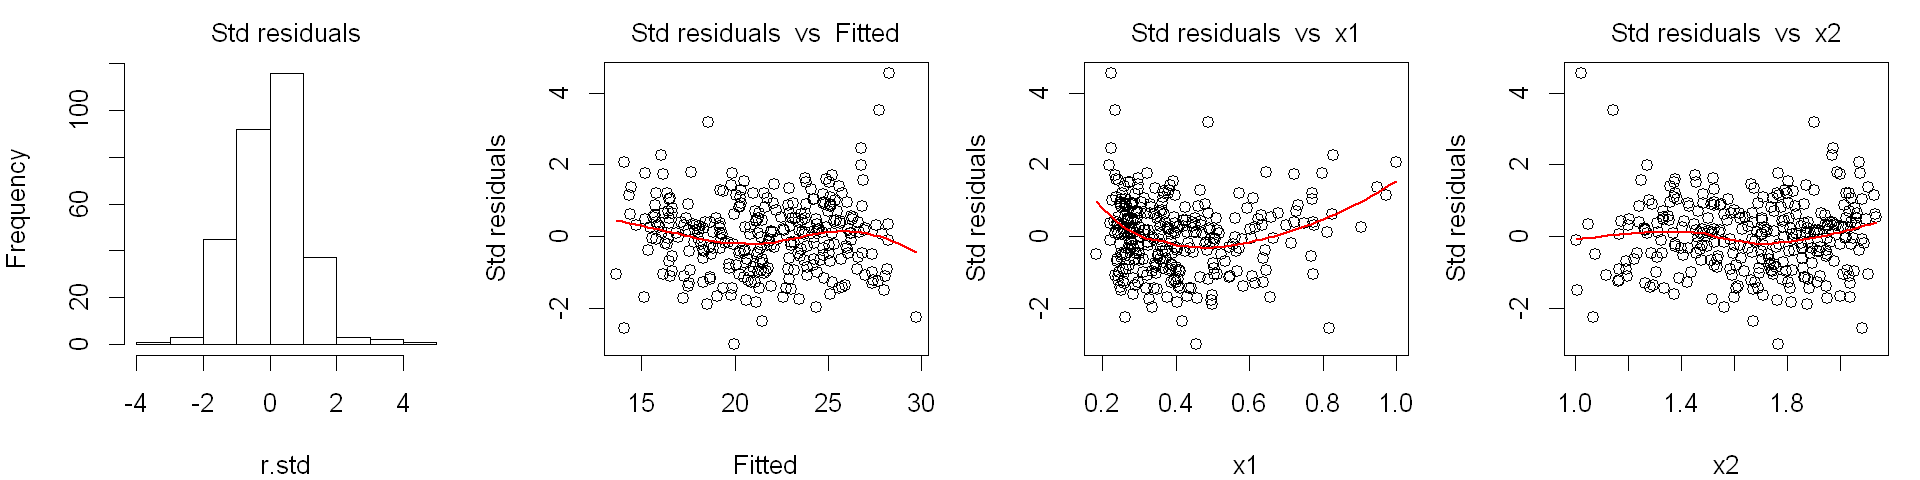

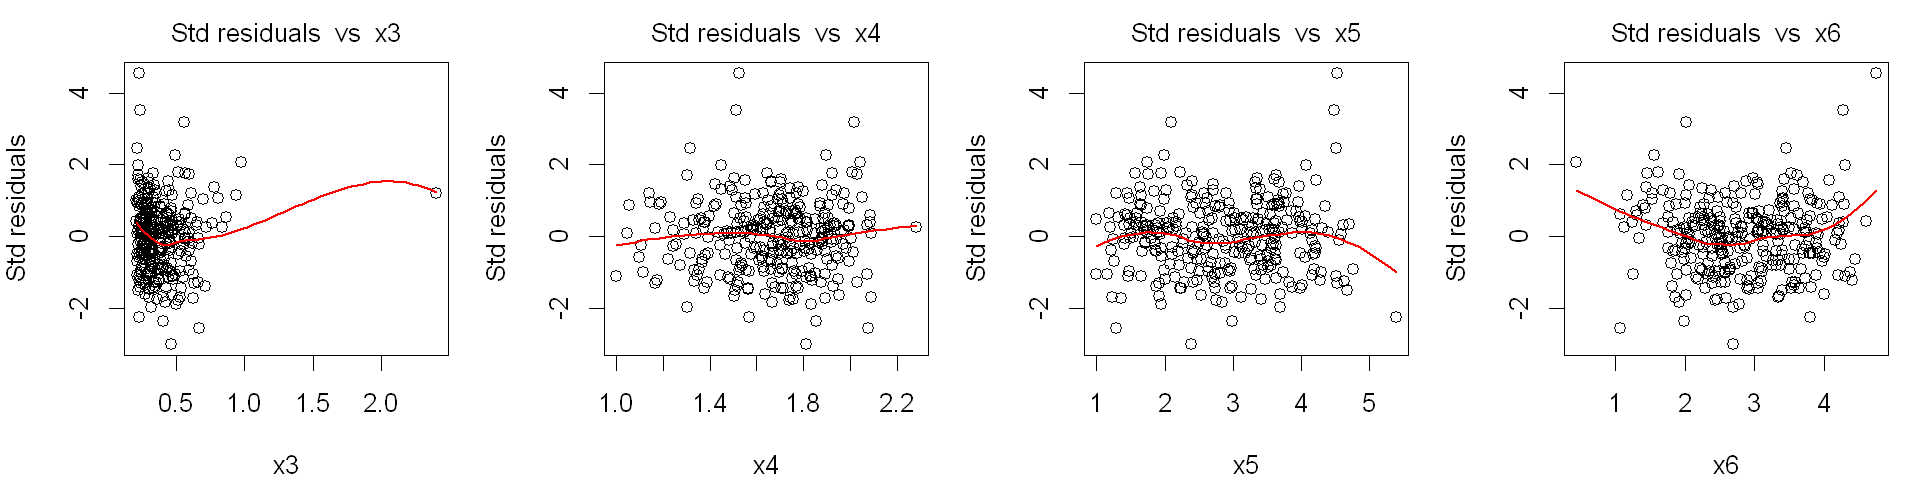

In [7]:
 options(repr.plot.width=16, repr.plot.height=4)
 par(mfrow = c(1, 4), mar=c(4,4,2,1), cex=1.3)

 plot(model)
 r.std = rstandard(model)
 y.hat = fitted(model)
 with(data,{
   hist(r.std, main="Std residuals", cex.main=1, font.main = 1)
   resplot(y.hat, r.std, xlab = "Fitted", ylab="Std residuals")
   resplot(x1, r.std, xlab = "x1", ylab="Std residuals")
   resplot(x2, r.std, xlab = "x2", ylab="Std residuals")
   resplot(x3, r.std, xlab = "x3", ylab="Std residuals")
   resplot(x4, r.std, xlab = "x4", ylab="Std residuals")
   resplot(x5, r.std, xlab = "x5", ylab="Std residuals")
   resplot(x6, r.std, xlab = "x6", ylab="Std residuals")
 }
 )  

Upon inspecting residual plots we choose to transform the response predictors x1, x3, and x4

Various transformations until the right ones were found

####  Transformed data analysis

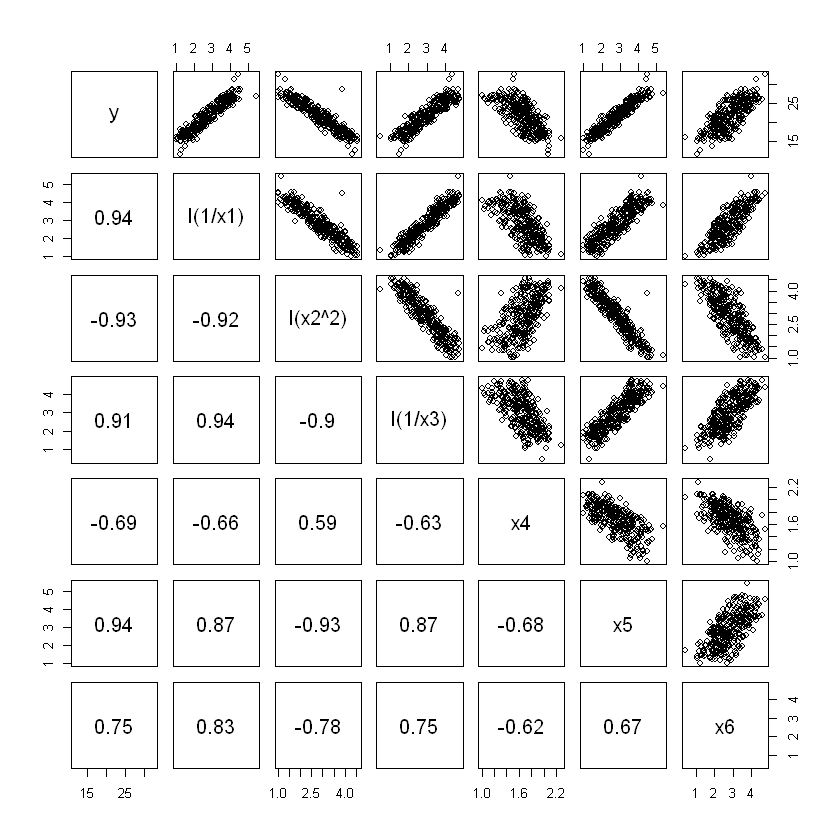

In [154]:
options(repr.plot.width=7, repr.plot.height=7)

pairs(y ~ I(1/x1) + I(x2^2) + I(1/x3) + x4 + x5 + x6, data = data, 
      lower.panel=panel.cor, 
      cex.labels=1.5
)

In [155]:
model = lm(y ~ I(1/x1) + I(x2^2) + I(1/x3) + x4 + x5 + x6, data = data)

# summary(model)

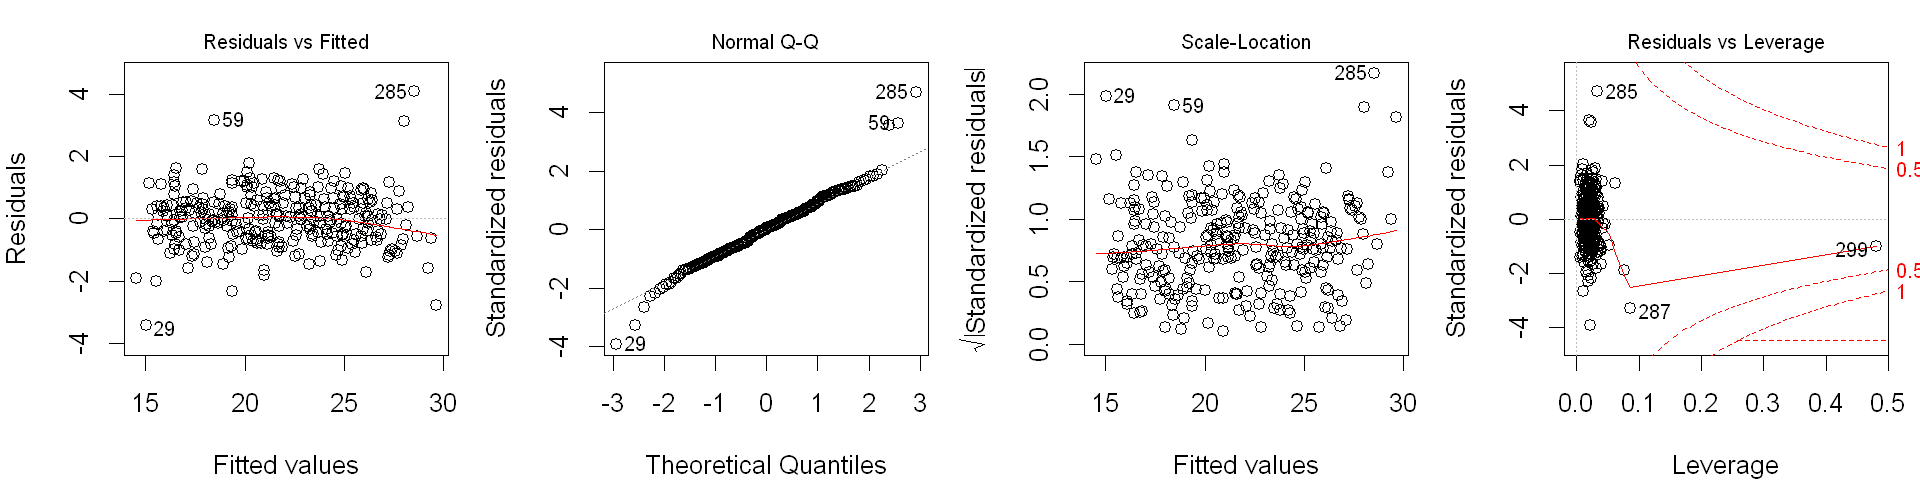

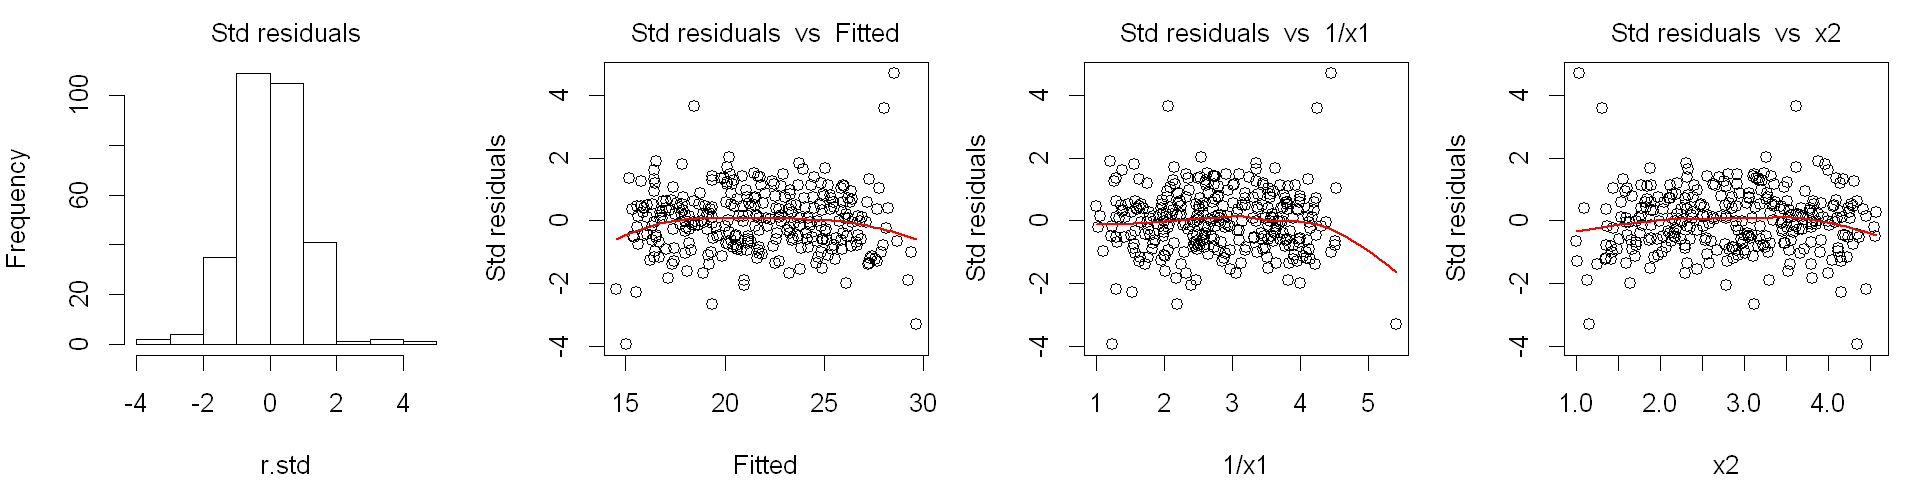

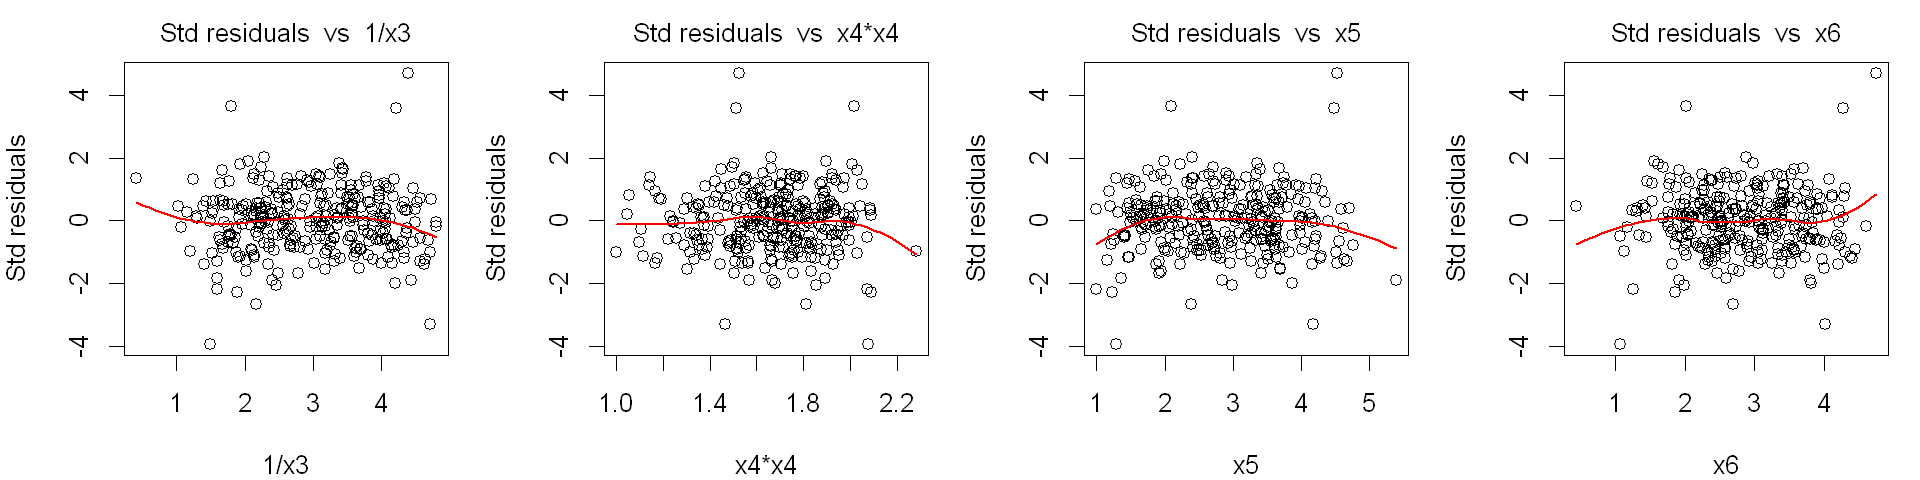

In [156]:
 options(repr.plot.width=16, repr.plot.height=4)
 par(mfrow = c(1, 4), mar=c(4,4,2,1), cex=1.3)

 plot(model)
 r.std = rstandard(model)
 y.hat = fitted(model)
 with(data,{
   hist(r.std, main="Std residuals", cex.main=1, font.main = 1)
   resplot(y.hat, r.std, xlab = "Fitted", ylab="Std residuals")
   resplot((1/x1), r.std, xlab = "1/x1", ylab="Std residuals")
   resplot((x2^2), r.std, xlab = "x2^2", ylab="Std residuals")
   resplot((1/x3), r.std, xlab = "1/x3", ylab="Std residuals")
   resplot((x4), r.std, xlab = "x4", ylab="Std residuals")
   resplot(x5, r.std, xlab = "x5", ylab="Std residuals")
   resplot(x6, r.std, xlab = "x6", ylab="Std residuals")
 }
 )  

The normality assumptions are met now. There are minor deviations in the standardised residuals vs x1 , x3 and x6 plots, but these are the best results I could get.

#### Clean up the data. Formulas below used to find outliers and leverage case.


$$
|r_i| > 2\text{ to } 4 \qquad
h_{ii} > 2 \cdot \frac{p+1}{n} \qquad
D_i > \frac{4}{n-p-1}
$$

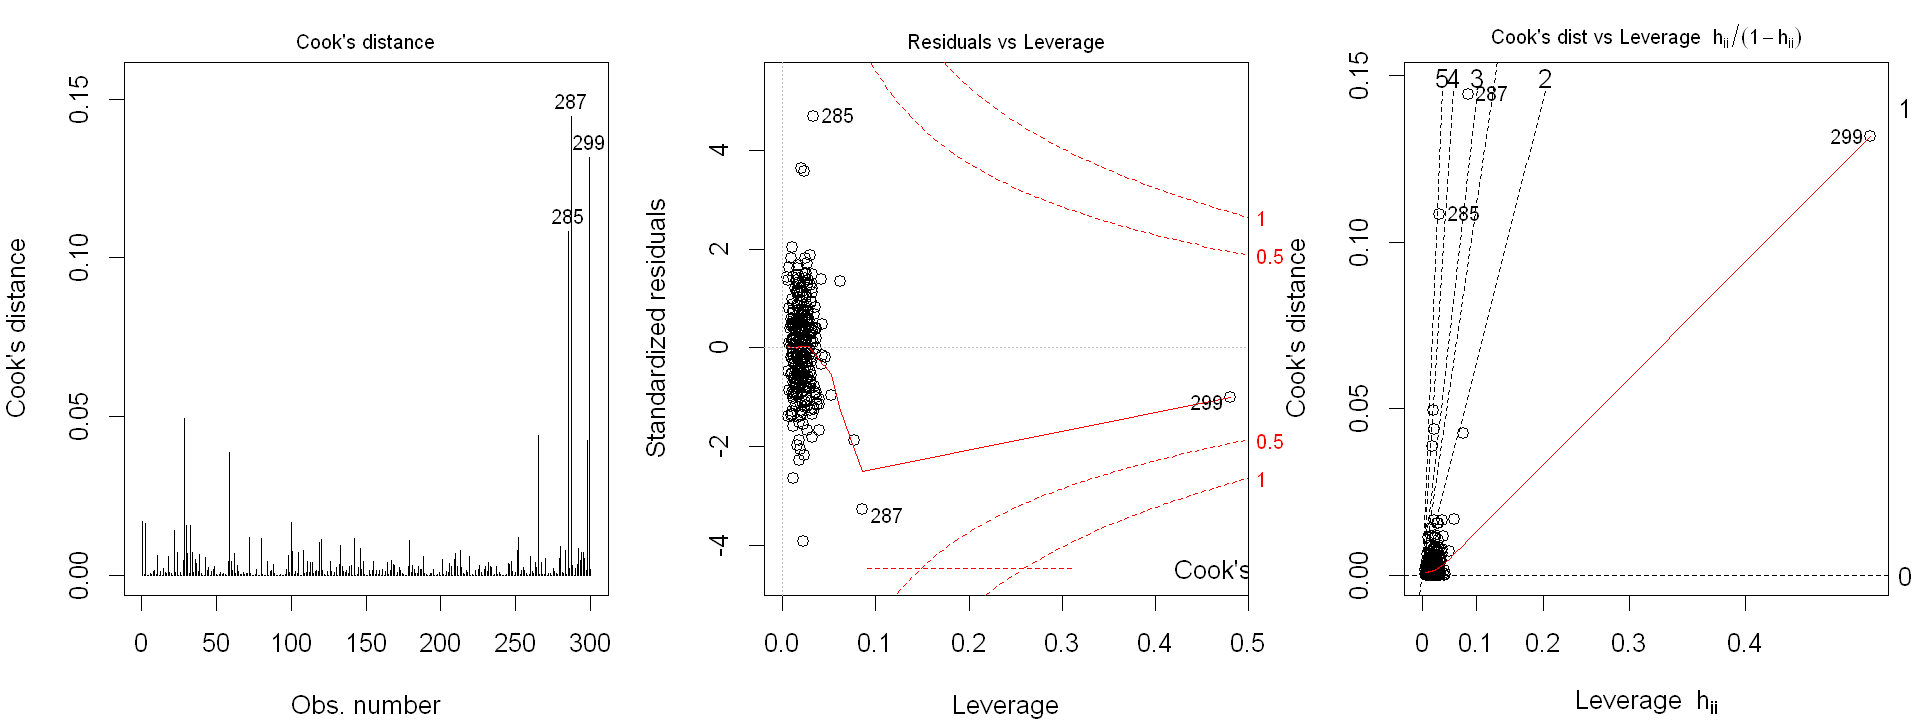

In [157]:
# built-in plots
options(repr.plot.width=16, repr.plot.height=6)
par(mfrow = c(1, 3), mar=c(4,4,2,1), cex=1.3)
plot(model, which=4:6)

In [158]:
model # the model has 6 slopes and 1 intercept


Call:
lm(formula = y ~ I(1/x1) + I(x2^2) + I(1/x3) + x4 + x5 + x6, 
    data = data)

Coefficients:
(Intercept)      I(1/x1)      I(x2^2)      I(1/x3)           x4           x5  
    7.96347      2.05972      0.35527     -0.03047     -0.05193      2.36485  
         x6  
    0.10929  


In [159]:
n = nrow(data) # number of cases
p = 6         # number of slopes

In [160]:
r = rstandard(model)        # standardised residuals
h = hatvalues(model)        # leverages
D = cooks.distance(model)   # Cook's distance


In [161]:
outliers = abs(r) > 3
sum(outliers)           # 5 potential outliers
which(outliers)

[1] 5

29  59 265 285 287 
 29  59 265 285 287

In [162]:
leverages = h > 2*(p+1)/n
sum(leverages) #7 leverage cases
which(leverages)

[1] 5

1  24 287 298 299 
  1  24 287 298 299

In [163]:
BadLeverages  = outliers & leverages    # bad leverage = outlier + leverage
GoodLeverages = (!outliers) & leverages # good leverages = not-outlier + leverage
sum(BadLeverages) #1 bad leverage
which(BadLeverages)

[1] 1

287 
287

In [185]:
influence = D > 4/(n-p-1)
sum(influence) # 13 influential cases
which(influence)

[1] 13

1   3  22  29  30  33  59 100 265 285 287 298 299 
  1   3  22  29  30  33  59 100 265 285 287 298 299

In [165]:
sum(outliers & influence)   # all 5 outliers are influential, within that one is a bad leverage(287)
which(outliers & influence)

[1] 5

29  59 265 285 287 
 29  59 265 285 287

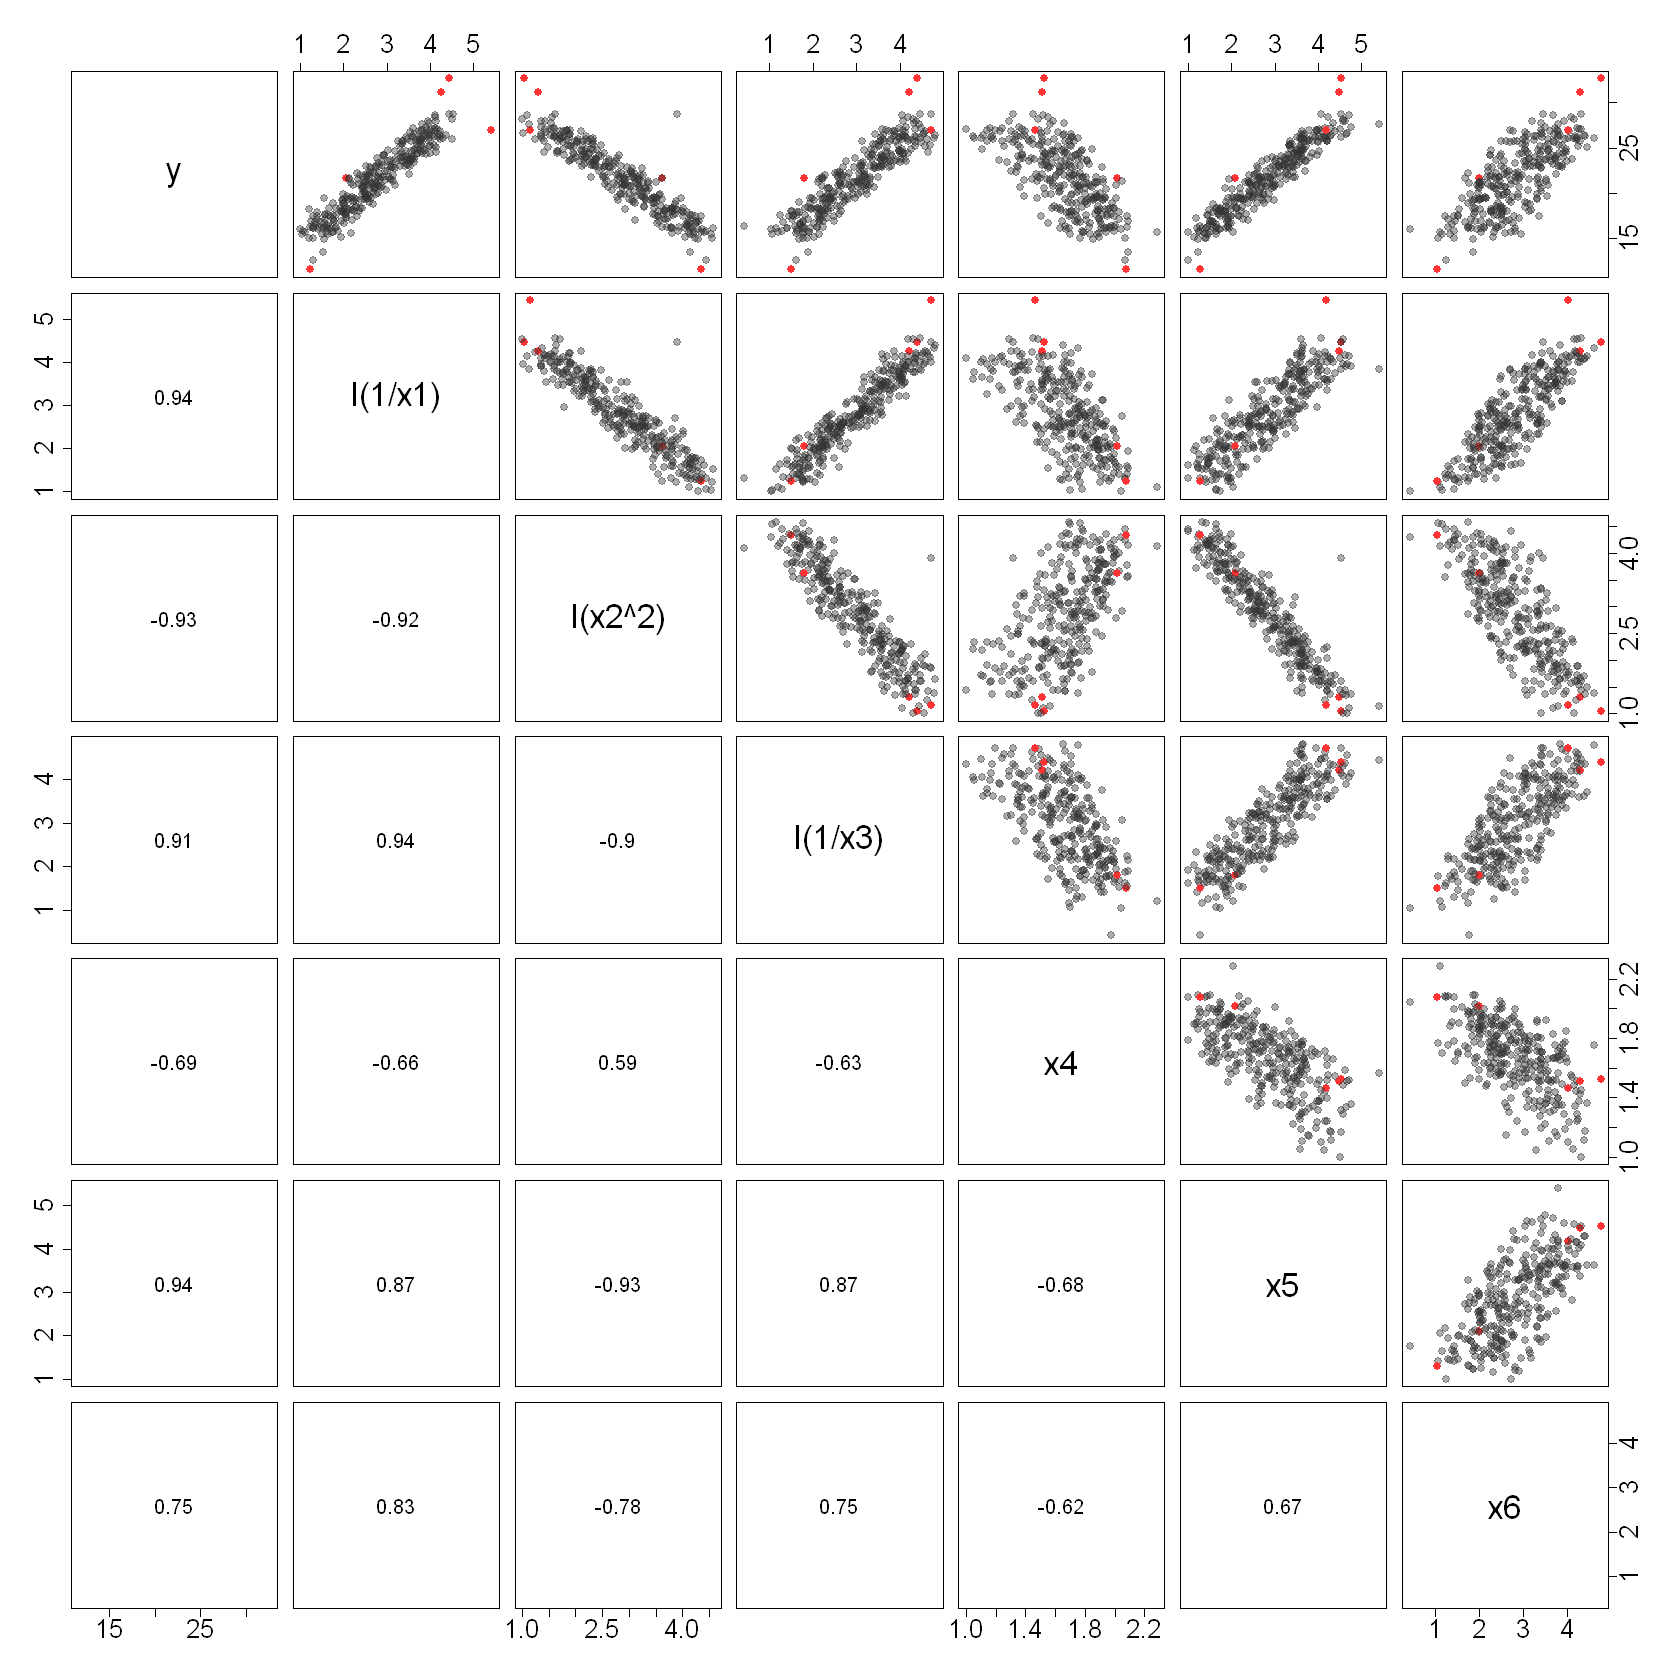

In [227]:
options(repr.plot.width=14, repr.plot.height=14)

# find the location of the outliers in the scatterplot matrix
flag = as.numeric(outliers)

pairs(y ~ I(1/x1) + I(x2^2) + I(1/x3) + x4 + x5 + x6, data = data, 
      lower.panel=panel.cor, 
      cex.labels=2.5,
      cex=2,
      cex.axis=2,
      pch=20, 
      col=rgb(red=0.2 + flag*0.8, green=0.2, blue=0.2, alpha=0.4 + flag*0.6) # highlight outliers in red
)

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


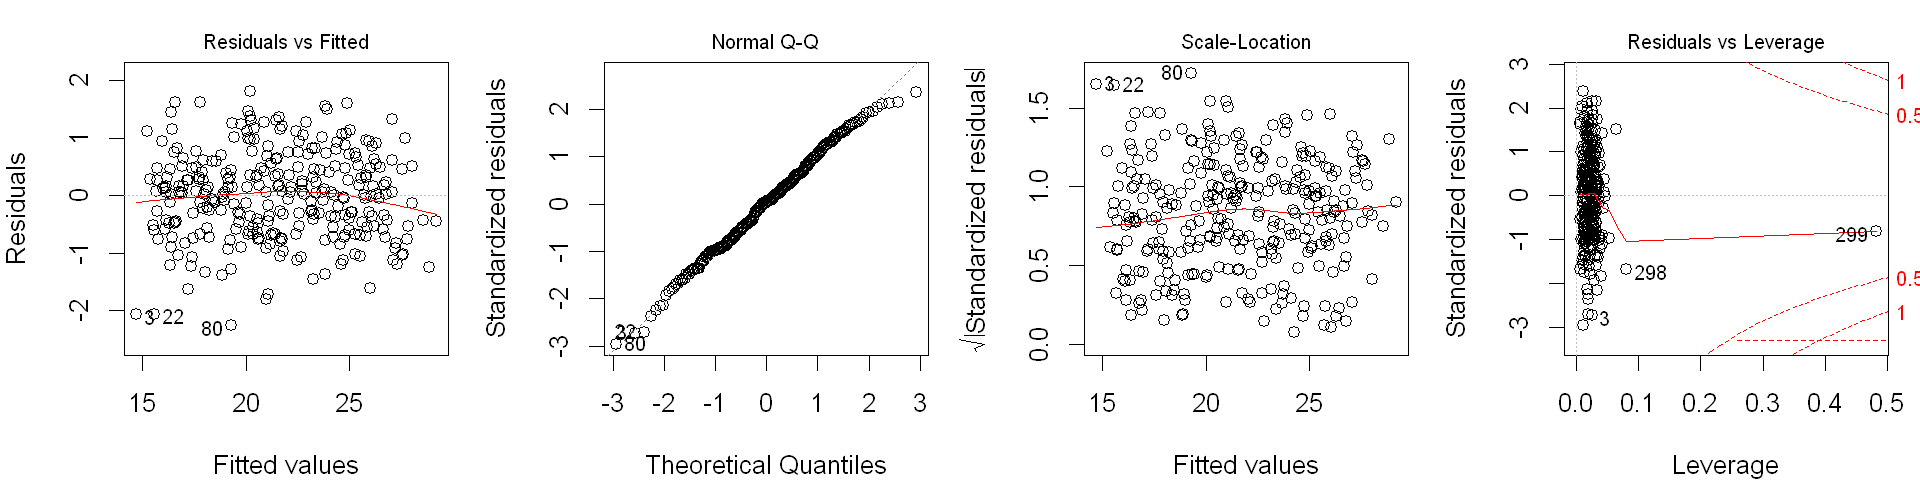

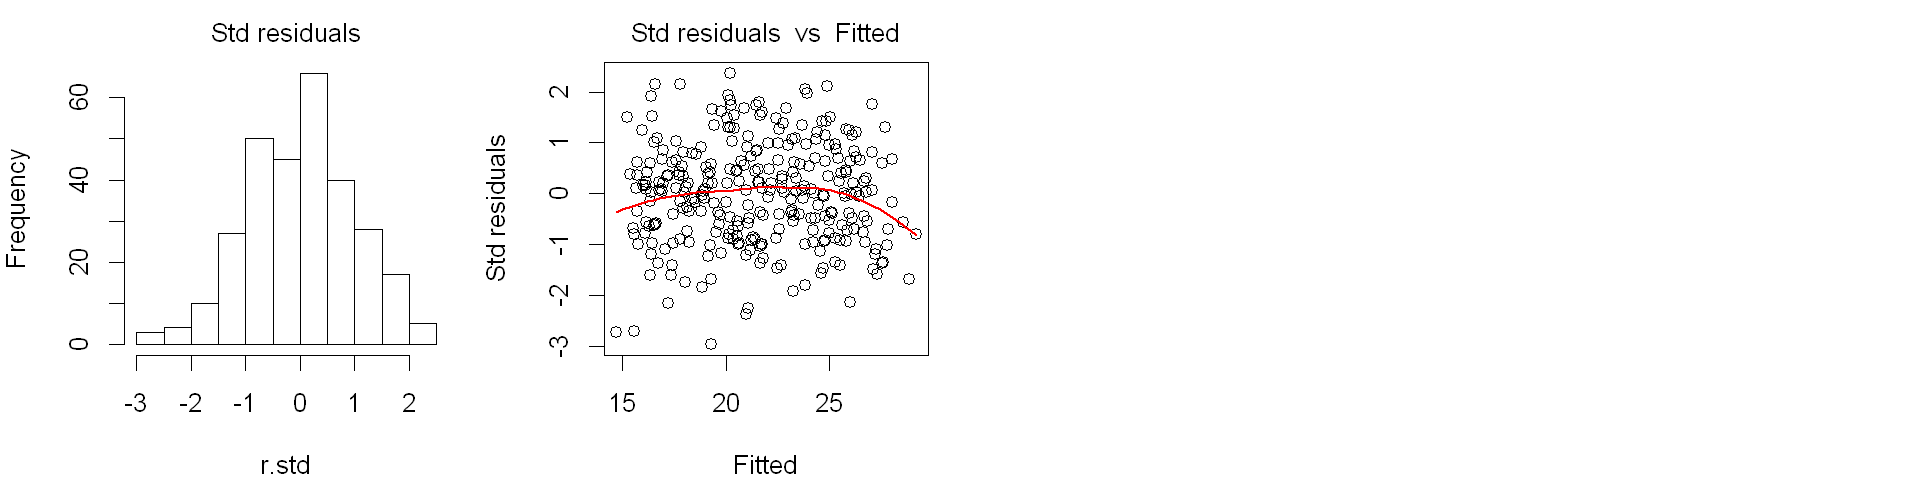

In [229]:
 options(repr.plot.width=16, repr.plot.height=4)
 par(mfrow = c(1, 4), mar=c(4,4,2,1), cex=1.3)

 plot(model)
 r.std = rstandard(model)
 y.hat = fitted(model)
 with(data,{
   hist(r.std, main="Std residuals", cex.main=1, font.main = 1)
   resplot(y.hat, r.std, xlab = "Fitted", ylab="Std residuals")
   resplot((1/x1), r.std, xlab = "1/x1", ylab="Std residuals")
   resplot((x2^2), r.std, xlab = "x2^2", ylab="Std residuals")
   resplot((1/x3), r.std, xlab = "1/x3", ylab="Std residuals")
   resplot(x4, r.std, xlab = "x4", ylab="Std residuals")
   resplot(x5, r.std, xlab = "x5", ylab="Std residuals")
   resplot(x6, r.std, xlab = "x6", ylab="Std residuals")
 }
 )  

In [168]:
# inspect outliers
data[outliers,]

,y,x1,x2,x3,x4,x5,x6
29,11.60195,0.8167321,2.083069,0.6676608,2.079190,1.283844,1.062233
59,21.64882,0.4875958,1.903240,0.5565657,2.016713,2.089600,2.011113
265,31.15331,0.2350460,1.144913,0.2372908,1.510692,4.476991,4.278418
285,32.60803,0.2242785,1.020651,0.2281052,1.523457,4.528890,4.754111
287,26.87493,0.1843459,1.076125,0.2124307,1.465077,4.175066,4.010855


In [46]:
# load car package
install.packages("car", repos='http://cran.us.r-project.org')
library(car)

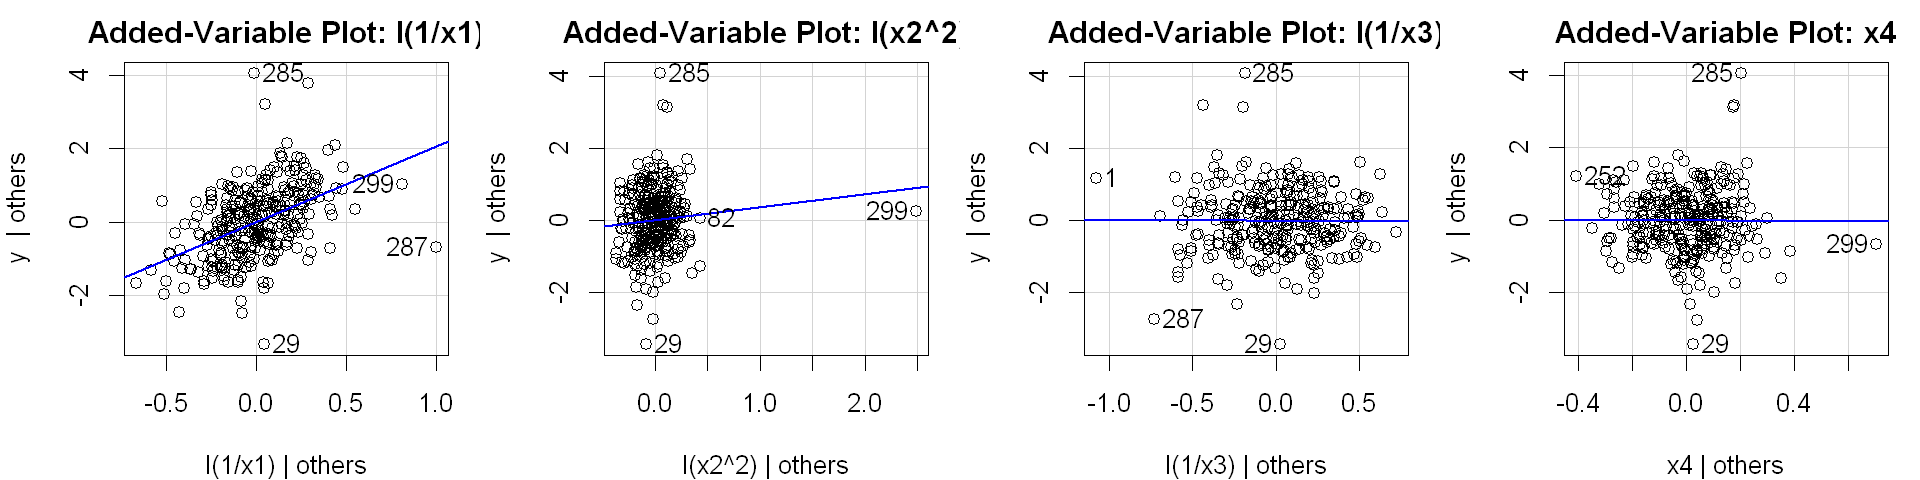

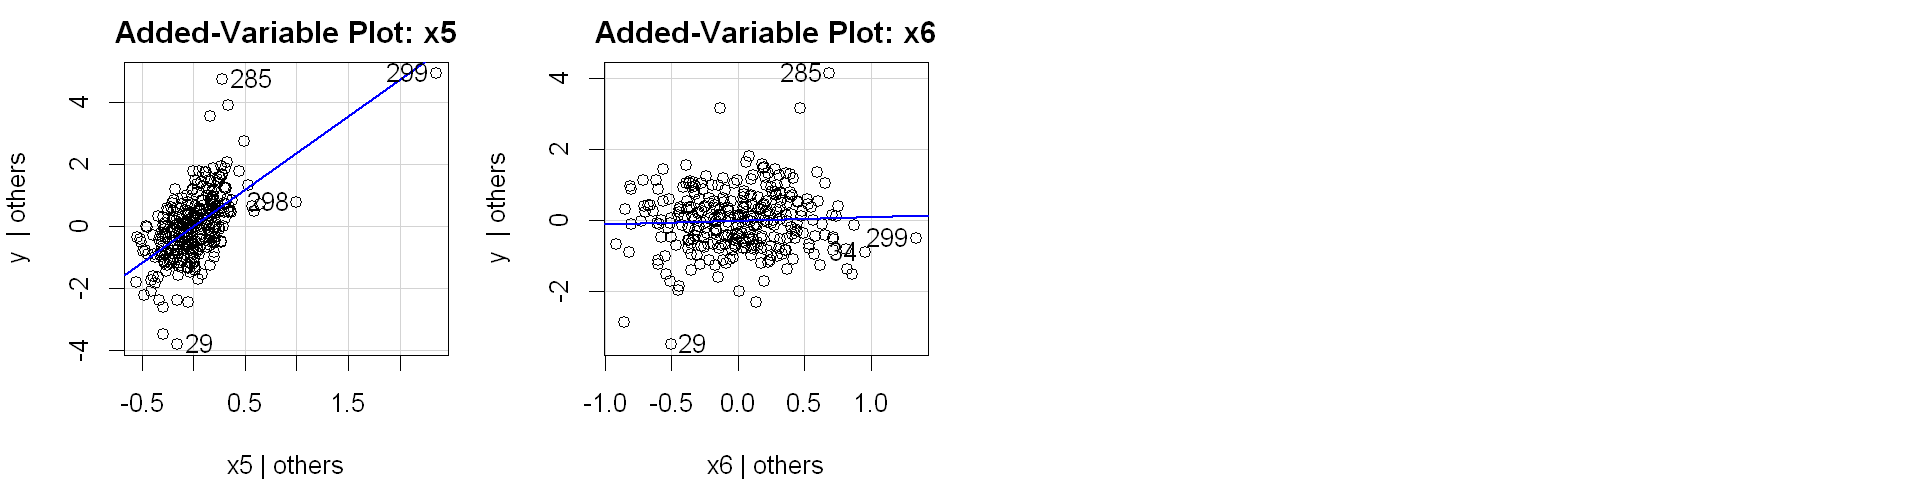

In [171]:
# added value plots - used to inspect the influence of each predictor
# these plots can help to spot deviation from normality asumptions
# also, they can help to identify unusual cases

options(repr.plot.width=16, repr.plot.height=4)
par(mfrow = c(1, 4), mar=c(4,4,2,1), cex=1.3)

avPlot(model,variable="I(1/x1)")
avPlot(model,variable="I(x2^2)")
avPlot(model,variable="I(1/x3)")
avPlot(model,variable="x4")
avPlot(model,variable="x5")
avPlot(model,variable="x6")

From the above added variable plots I have decided to only remove the bad leverage.

In [196]:
#remove bad leverage 
#remove outliers, bad leverage and influencers!
#outliers include all influential and bad leverage
data1<-data[!outliers,]

In [197]:
model1 = lm(y ~ I(1/x1) + I(x2^2) + I(1/x3) + x4 + x5 + x6, data = data1)
summary(model1)


Call:
lm(formula = y ~ I(1/x1) + I(x2^2) + I(1/x3) + x4 + x5 + x6, 
    data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.26092 -0.54574  0.03482  0.49696  1.80896 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.347189   1.662931   5.621 4.49e-08 ***
I(1/x1)      2.189128   0.204409  10.710  < 2e-16 ***
I(x2^2)      0.268564   0.208580   1.288    0.199    
I(1/x3)      0.002462   0.153541   0.016    0.987    
x4          -0.347739   0.313787  -1.108    0.269    
x5           2.162476   0.168618  12.825  < 2e-16 ***
x6          -0.082034   0.118428  -0.693    0.489    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7673 on 288 degrees of freedom
Multiple R-squared:  0.9566,	Adjusted R-squared:  0.9557 
F-statistic:  1058 on 6 and 288 DF,  p-value: < 2.2e-16


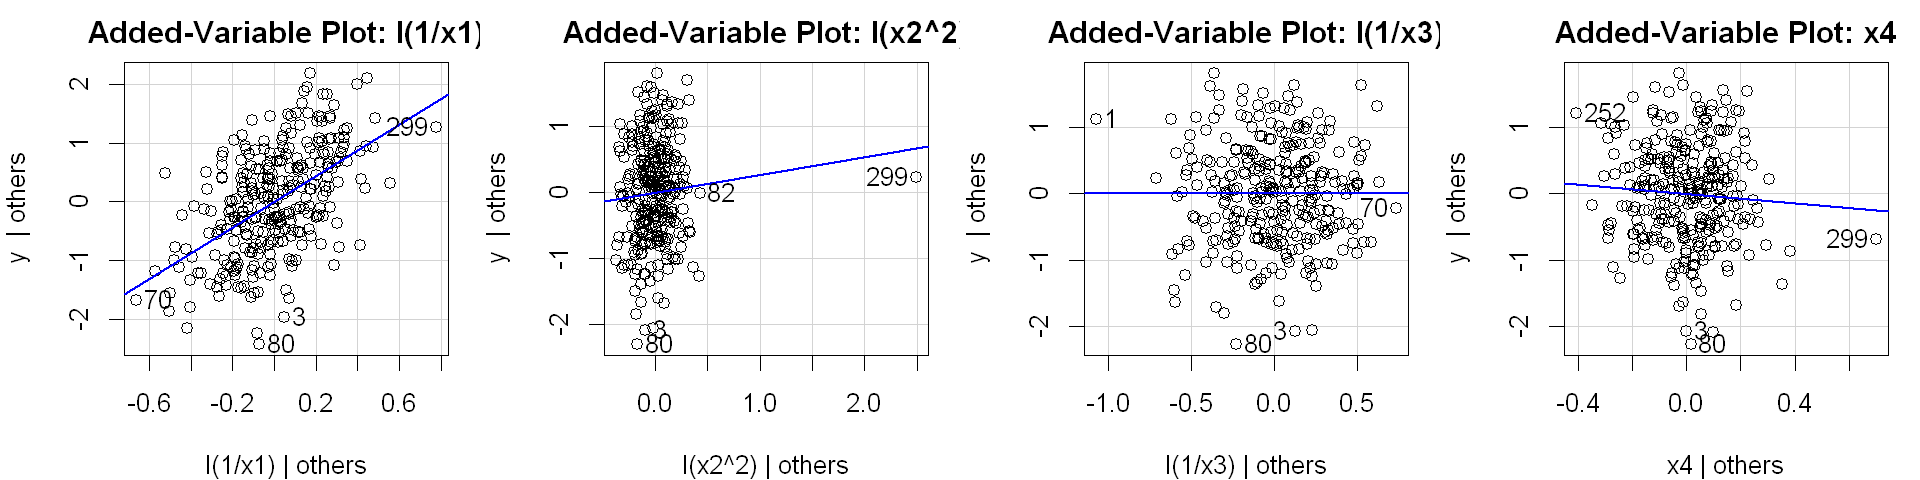

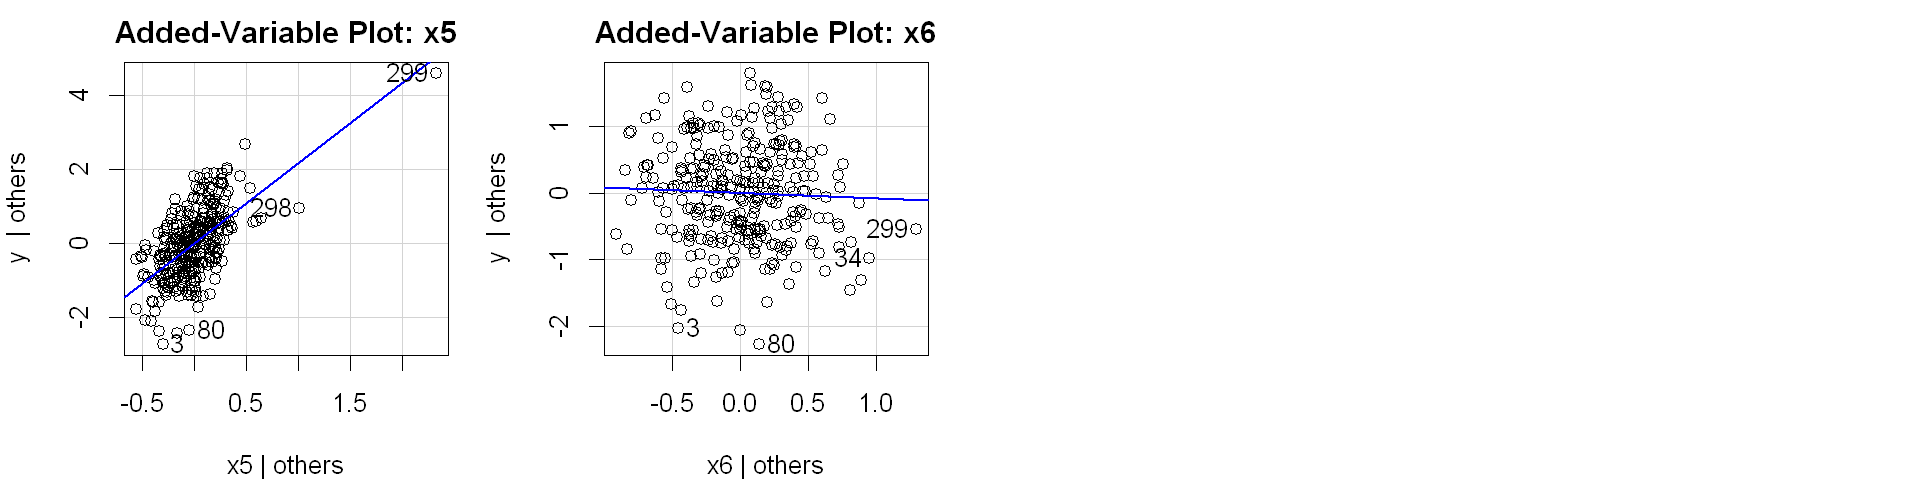

In [198]:
# added value plots - used to inspect the influence of each predictor
# these plots can help to spot deviation from normality asumptions
# also, they can help to identify unusual cases

options(repr.plot.width=16, repr.plot.height=4)
par(mfrow = c(1, 4), mar=c(4,4,2,1), cex=1.3)

avPlot(model1,variable="I(1/x1)")
avPlot(model1,variable="I(x2^2)")
avPlot(model1,variable="I(1/x3)")
avPlot(model1,variable="x4")
avPlot(model1,variable="x5")
avPlot(model1,variable="x6")

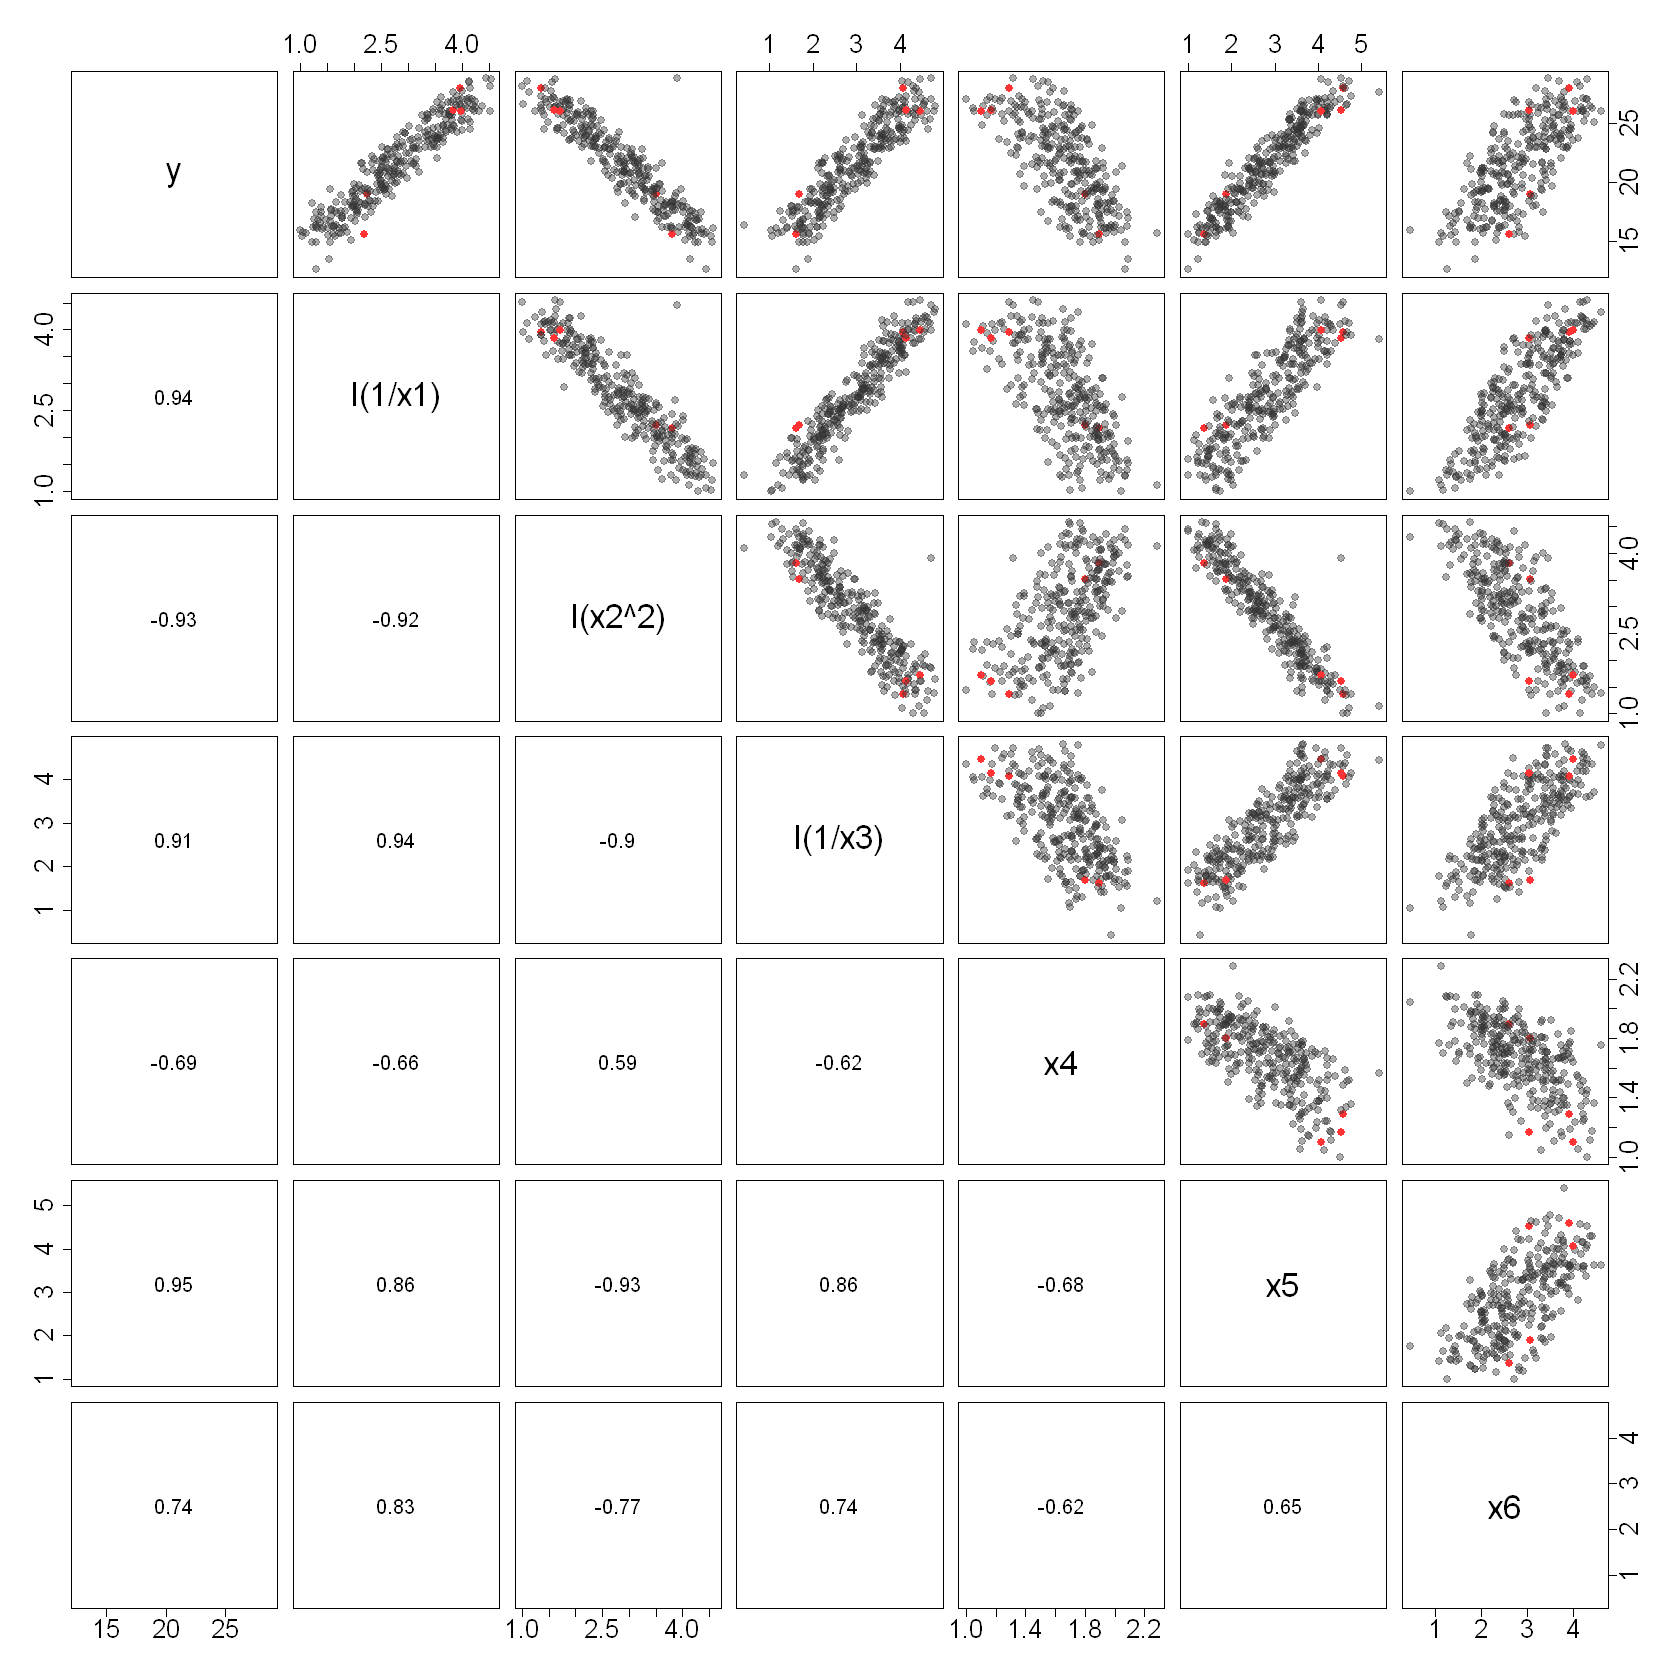

In [204]:
options(repr.plot.width=14, repr.plot.height=14)

# find the location of the outliers in the scatterplot matrix
flag = as.numeric(outliers)

pairs(y ~ I(1/x1) +  I(x2^2) + I(1/x3) + x4 + x5 + x6, data = data1, 
      lower.panel=panel.cor, 
      cex.labels=2.5,
      cex=2,
      cex.axis=2,
      pch=20, 
      col=rgb(red=0.2 + flag*0.8, green=0.2, blue=0.2, alpha=0.4 + flag*0.6) # highlight outliers in red
)

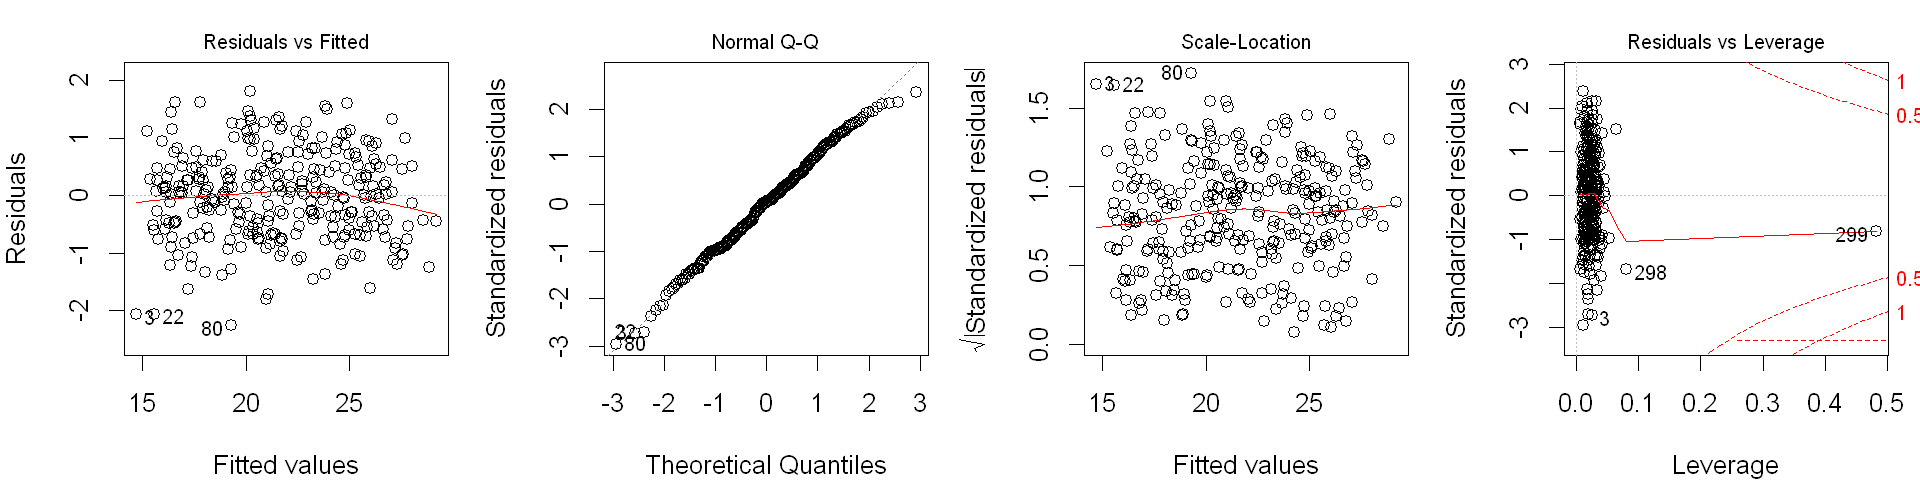

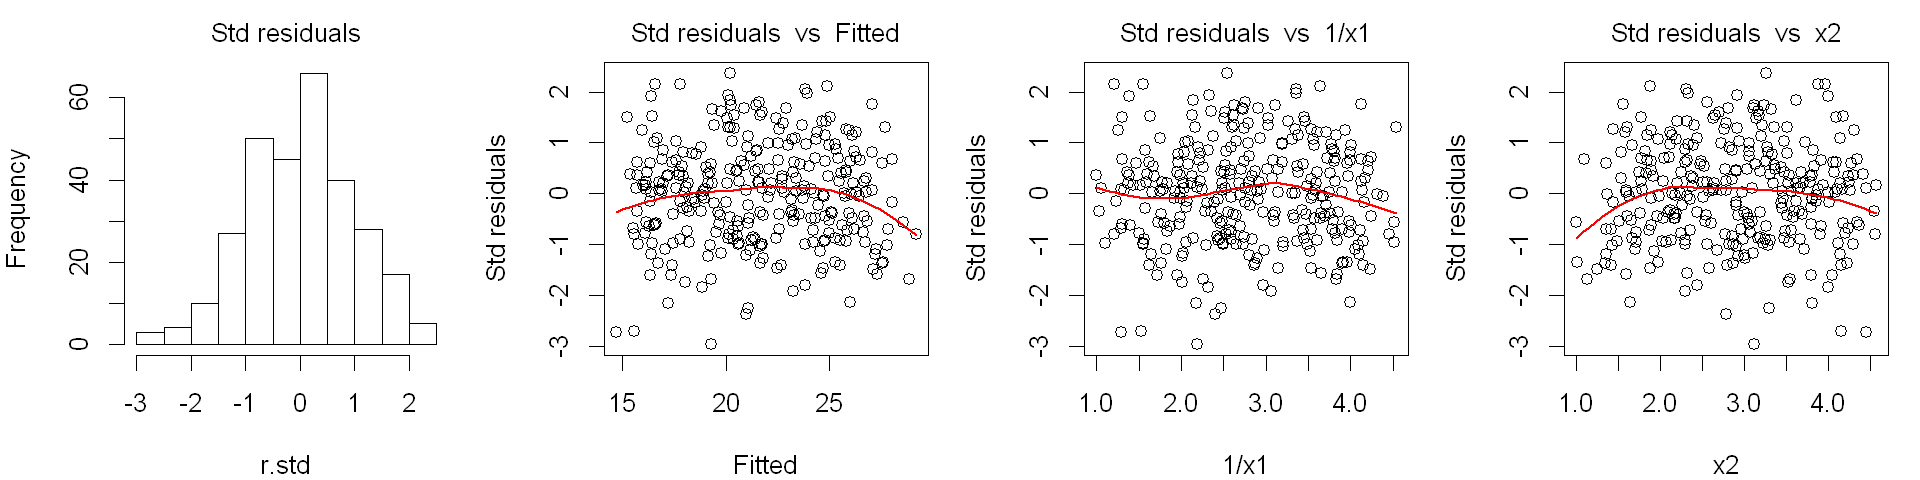

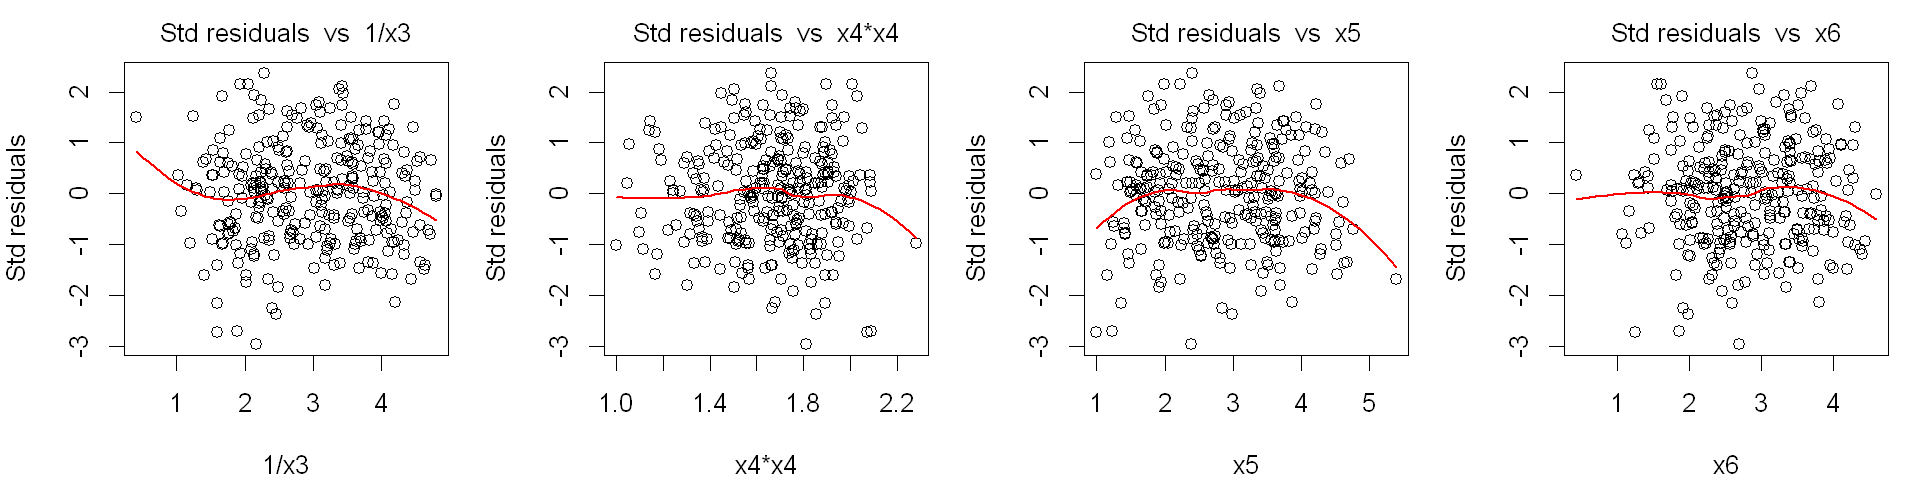

In [203]:
 options(repr.plot.width=16, repr.plot.height=4)
 par(mfrow = c(1, 4), mar=c(4,4,2,1), cex=1.3)
 
 plot(model1)
 r.std = rstandard(model1)
 y.hat = fitted(model1)
 with(data1,{
   hist(r.std, main="Std residuals", cex.main=1, font.main = 1)
   resplot(y.hat, r.std, xlab = "Fitted", ylab="Std residuals")
   resplot((1/x1), r.std, xlab = "1/x1", ylab="Std residuals")
   resplot((x2^2), r.std, xlab = "x2^2", ylab="Std residuals")
   resplot((1/x3), r.std, xlab = "1/x3", ylab="Std residuals")
   resplot(x4, r.std, xlab = "x4", ylab="Std residuals")
   resplot(x5, r.std, xlab = "x5", ylab="Std residuals")
   resplot(x6, r.std, xlab = "x6", ylab="Std residuals")
 }
 )  

Outliers have been removed, therefore scatter plots and residual plots looks better

In [201]:
# variation inflation factors are used to spot multicollinearity
# i.e. a near-linear relationship between the predictors
vif(model1)

I(1/x1)   I(x2^2)   I(1/x3)        x4        x5        x6 
16.201114 16.783468 10.164870  2.652883 11.994166  4.369646

This means that I(1/x1), x2 and x5 might be near-linearly related: VIF values >10 are flags indicating that a further analysis is required to understant the influence of the flagged predictors

### 1.2. Variable selection

In [2]:
# use variable selection methods to find the best model
# try adding terms of the from I(x^2) and I(1/x) to the model

We start by fitting the "full" model having all predictors:

In [207]:
# full model
model0 = lm(y ~ I(1/x1) + I(x2^2) + I(1/x3) + x4 + x5 + x6, data = data1)
summary(model0)


Call:
lm(formula = y ~ I(1/x1) + I(x2^2) + I(1/x3) + x4 + x5 + x6, 
    data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.26092 -0.54574  0.03482  0.49696  1.80896 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.347189   1.662931   5.621 4.49e-08 ***
I(1/x1)      2.189128   0.204409  10.710  < 2e-16 ***
I(x2^2)      0.268564   0.208580   1.288    0.199    
I(1/x3)      0.002462   0.153541   0.016    0.987    
x4          -0.347739   0.313787  -1.108    0.269    
x5           2.162476   0.168618  12.825  < 2e-16 ***
x6          -0.082034   0.118428  -0.693    0.489    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7673 on 288 degrees of freedom
Multiple R-squared:  0.9566,	Adjusted R-squared:  0.9557 
F-statistic:  1058 on 6 and 288 DF,  p-value: < 2.2e-16


The individual t-tests indicate that the I(1/x3) predictor is insignificant (p-value is 98.7%) in the presence of the remaining predictors. Hence we remove this predictor and fit a reduced model


In [208]:
# first reduced model
model1 = lm(y ~ I(1/x1) +  I(x2^2) + x4 + x5 + x6, data=data1)
summary(model1)


Call:
lm(formula = y ~ I(1/x1) + I(x2^2) + x4 + x5 + x6, data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.26148 -0.54475  0.03486  0.49786  1.80808 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.35038    1.64815   5.673  3.4e-08 ***
I(1/x1)      2.19128    0.15414  14.216  < 2e-16 ***
I(x2^2)      0.26814    0.20653   1.298    0.195    
x4          -0.34783    0.31319  -1.111    0.268    
x5           2.16264    0.16803  12.870  < 2e-16 ***
x6          -0.08237    0.11635  -0.708    0.480    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.766 on 289 degrees of freedom
Multiple R-squared:  0.9566,	Adjusted R-squared:  0.9559 
F-statistic:  1274 on 5 and 289 DF,  p-value: < 2.2e-16


The individual t-tests indicate that the x6 predictor is insignificant (p-value is 48.0%) in the presence of the remaining predictors. Hence we remove this predictor and fit a reduced model:


In [209]:
# second reduced model
model2 = lm(y ~ I(1/x1) +  I(x2^2) + I(1/x3) + x5, data=data1)
summary(model2)


Call:
lm(formula = y ~ I(1/x1) + I(x2^2) + I(1/x3) + x5, data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27131 -0.53680  0.05912  0.50447  1.81422 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.83075    1.00350   7.803  1.1e-13 ***
I(1/x1)      2.18540    0.17484  12.499  < 2e-16 ***
I(x2^2)      0.39132    0.17699   2.211   0.0278 *  
I(1/x3)      0.01381    0.15070   0.092   0.9271    
x5           2.27874    0.13298  17.135  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7664 on 290 degrees of freedom
Multiple R-squared:  0.9564,	Adjusted R-squared:  0.9558 
F-statistic:  1591 on 4 and 290 DF,  p-value: < 2.2e-16


The individual t-tests indicate that the I(1/x3) predictor is insignificant (p-value is 92.7%) in the presence of the remaining predictors. Hence we remove this predictor and fit a reduced model:


In [211]:
# third reduced model
model3 = lm(y ~ I(1/x1) +  I(x2^2) + x5, data=data1)
summary(model3)


Call:
lm(formula = y ~ I(1/x1) + I(x2^2) + x5, data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27481 -0.53867  0.05991  0.50537  1.80891 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.8405     0.9961   7.871 6.98e-14 ***
I(1/x1)       2.1961     0.1294  16.968  < 2e-16 ***
I(x2^2)       0.3899     0.1760   2.215   0.0275 *  
x5            2.2806     0.1312  17.382  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7651 on 291 degrees of freedom
Multiple R-squared:  0.9564,	Adjusted R-squared:  0.956 
F-statistic:  2129 on 3 and 291 DF,  p-value: < 2.2e-16


The individual t-tests indicate that the x2 predictor is significant (p-value is 2.8%) in the presence of the remaining predictors.
p value is not high enought to grant the removal of the x2 predictor, but we will do that anyway, for "learning purposes":


In [212]:
# fourth reduced model
model4 = lm(y ~ I(1/x1) + x5, data=data1)
summary(model4)


Call:
lm(formula = y ~ I(1/x1) + x5, data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.37520 -0.52068  0.03908  0.53309  1.83126 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.02162    0.15208   65.90   <2e-16 ***
I(1/x1)      2.01591    0.10133   19.89   <2e-16 ***
x5           2.08367    0.09715   21.45   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7702 on 292 degrees of freedom
Multiple R-squared:  0.9557,	Adjusted R-squared:  0.9554 
F-statistic:  3148 on 2 and 292 DF,  p-value: < 2.2e-16


There's nothing else to be removed, so we can start comparing the models we have built. We will begin by testing these models on the test dataset and computing the mean sum of errors squared,  𝑀𝑆𝐸 , for each of our models:

### 1.3. Model selection

In [3]:
# construct a table that displays the adjusted R2, AIC, BIC, 
# and the estimated and prediced hat-sigma's for a selection of models
# you should compare 3-4 models in this table

In [122]:
set.seed(123)                      # fix randomisation seed
n = length(data1$y)
test_ind = sample(n, size = n/10)  # randomly select 10% of row numbers

test  = data1[test_ind, ]           # test data - "test_ind" rows only
train = data1[-test_ind, ]          # training data - not "test_ind" rows

In [123]:
n.test = nrow(test) # the number of cases in the test dataset

# predicted values of y for each model
ly0 = predict(model0, newdata = test)
ly1 = predict(model1, newdata = test)
ly2 = predict(model2, newdata = test)
ly3 = predict(model3, newdata = test)
ly4 = predict(model4, newdata = test)

# MSE. Note: in the live example I computed SSE's only. I forgot to divide by d.o.f.! my bad!
# note also that each model has different residual degrees of freedom 
# this is because they have different numbers of predictors
MSE0 = sum( (ly0 - log(test$y))^2 ) / (n.test-p-1) 
MSE1 = sum( (ly1 - log(test$y))^2 ) / (n.test-p+1-1)
MSE2 = sum( (ly2 - log(test$y))^2 ) / (n.test-p+2-1)
MSE3 = sum( (ly3 - log(test$y))^2 ) / (n.test-p+3-1)
MSE4 = sum( (ly4 - log(test$y))^2 ) / (n.test-p+4-1)


Next, we will use the summary table of each model to get access to the wanted quantities:  𝜎̂   and  𝑅2𝑎𝑑𝑗

In [124]:
# save summary tables into variables
s0 = summary(model0)
s1 = summary(model1)
s2 = summary(model2)
s3 = summary(model3)
s4 = summary(model4)

In [127]:
# Compare the models. We want to display the following quantities:
# - residual standard errors for the train data - smaller is better
# - residual standard error for the test data - smaller is better
# - R2-adjusted values - bigger is better
# - Akaike Information Criterion (AIC) - smaller is better
# - Bayesian Information Criterion (BIC) - smaller is better
# We could also include F-values and R2, but they are less important/informative

table = data.frame(row.names=c("Full","model1","model2","model3","model4"),
                   #                   F = c(s0$fstatistic[1],s1$fstatistic[1],s2$fstatistic[1],s3$fstatistic[1],s4$fstatistic[1]),
                   sigma.train = c(s0$sigma,s1$sigma,s2$sigma,s3$sigma,s4$sigma),                
                   sigma.test = sqrt(c(MSE0,MSE1,MSE2,MSE3,MSE4)),                  
                   #                   R2 = c(s0$r.squared,s1$r.squared,s2$r.squared,s3$r.squared,s4$r.squared),   
                   R2.adj = c(s0$adj.r.squared,s1$adj.r.squared,s2$adj.r.squared,s3$adj.r.squared,s4$adj.r.squared),   
                   AIC = c(AIC(model0),AIC(model1),AIC(model2),AIC(model3),AIC(model4)),   
                   BIC = c(BIC(model0),BIC(model1),BIC(model2),BIC(model3),BIC(model4))  
)

round(table, 4)

,sigma.train,sigma.test,R2.adj,AIC,BIC
Full,0.8652,21.8480,0.9472,770.8806,800.4841
model1,0.8638,21.3682,0.9473,768.9028,794.8059
model2,0.8628,20.9214,0.9475,767.2184,789.4211
model3,0.8622,20.4949,0.9475,765.8631,784.3653
model4,0.8667,20.0468,0.9470,767.9387,782.7404


### 1.4. Conclusions

We could choose the second reduced model, model2, or the third reduced model, model3, as our "best" model:

-model2 has 𝜎̂ 𝑡𝑟𝑎𝑖𝑛 , 𝜎̂ 𝑡𝑒𝑠𝑡 , AIC and BIC values only slightly worse than those of model3.

-model3 has the smallest 𝜎̂ 𝑡𝑟𝑎𝑖𝑛 values, the highest 𝑅2𝑎𝑑𝑗 value, and the best(smallest) AIC score;

-model4 the smallest 𝜎̂ 𝑡𝑒𝑠𝑡 and has 𝜎̂ 𝑡𝑟𝑎𝑖𝑛 , 𝑅2𝑎𝑑𝑗 and AIC values only slightly worse and has best/smallest BIC

Overall, all 3 models have very similar 𝜎̂ 𝑡𝑟𝑎𝑖𝑛 , 𝜎̂ 𝑡𝑒𝑠𝑡 , and 𝑅2𝑎𝑑𝑗 values, though model3 was slightly better overall. Hence we choose model3 as our "best" model since it is simpler (has one predictor less) than model4.

#### Verify model selection

In [213]:
#verify using a built-in function stepAIC() that finds the best model in terms of the AIC criterion
# the last model in the list below is the best model according to the AIC
library(MASS)
stepAIC(model0)

Start:  AIC=-149.33
y ~ I(1/x1) + I(x2^2) + I(1/x3) + x4 + x5 + x6

          Df Sum of Sq    RSS      AIC
- I(1/x3)  1     0.000 169.58 -151.329
- x6       1     0.283 169.86 -150.838
- x4       1     0.723 170.30 -150.074
- I(x2^2)  1     0.976 170.56 -149.636
<none>                 169.58 -149.329
- I(1/x1)  1    67.534 237.11  -52.440
- x5       1    96.845 266.42  -18.057

Step:  AIC=-151.33
y ~ I(1/x1) + I(x2^2) + x4 + x5 + x6

          Df Sum of Sq    RSS      AIC
- x6       1     0.294 169.87 -152.818
- x4       1     0.724 170.30 -152.072
- I(x2^2)  1     0.989 170.57 -151.613
<none>                 169.58 -151.329
- x5       1    97.196 266.77  -19.668
- I(1/x1)  1   118.592 288.17    3.090

Step:  AIC=-152.82
y ~ I(1/x1) + I(x2^2) + x4 + x5

          Df Sum of Sq    RSS      AIC
- x4       1     0.483 170.36 -153.980
<none>                 169.87 -152.818
- I(x2^2)  1     1.722 171.59 -151.842
- x5       1   132.547 302.42   15.328
- I(1/x1)  1   136.726 306.60   19.377

S


Call:
lm(formula = y ~ I(1/x1) + I(x2^2) + x5, data = data1)

Coefficients:
(Intercept)      I(1/x1)      I(x2^2)           x5  
     7.8405       2.1961       0.3899       2.2806  


stepAIC verifies that model3 (y ~ I(1/x1) + x2 + x5) is the best model

---

# 2. Matrix Approach

### 2.1. The overall F-test for the full model

In [ ]:
# Construct X and H matrices for the full model
# Fit the full model: find estimated values of the unknown regression parameters
# Then draw the ANOVA table

## Matrix X for the full model

Constructing the design matrix X for the model ``y ~ x1i + x2 + x3i + x4i + x5 + x6`` and finding estimated values of the corresponding regression parameters. Then verifying results using the built-in statistical functions.

The design matrix is

$$
X = \begin{bmatrix} 1 & x_{11} & x_{12} & \dots & x_{1p} \\ 1 & x_{21} & x_{22} & \dots & x_{2p} \\ \vdots & \vdots & \vdots && \vdots\\ 1 & x_{n1} & x_{n2} & \dots & x_{np} \end{bmatrix} 
$$

The estimated values of the regression parameters are given by

$$
\hat{\vec\beta} = C X^T \vec y \qquad C = (X^T X)^{-1}
$$

In [214]:
data1$x1i <- 1/data1$x1
data1$x2i <- data1$x2^2
data1$x3i <- 1/data1$x3

In [215]:
n = nrow(data1) 
X = with(data1, cbind(rep(1,n), x1i,x2i, x3i, x4, x5, x6)) 
head(X)

,x1i,x2i,x3i,x4,x5,x6
1,1.297492,4.087620,0.4158691,1.976686,1.286955,1.782570
1,1.517888,4.569651,1.1519629,1.694605,1.317277,1.752476
1,1.294586,4.443624,1.5987345,2.074029,1.000000,1.259103
1,1.653214,4.076542,1.7035092,2.003035,1.493922,2.521147
1,1.428801,3.942765,2.0999598,1.995250,1.579013,2.124690
1,1.602427,4.407802,1.9157128,1.785108,1.002227,2.720220


In [216]:
y = data1$y
C = solve( t(X) %*% X )
beta = C %*% t(X) %*% y
beta

,9.347188589
x1i,2.189128071
x2i,0.268563515
x3i,0.002461955
x4,-0.347738624
x5,2.162475889
x6,-0.082033788


In [217]:
# verify computations
model = lm(y ~ x1i + x2i + x3i + x4 + x5 + x6, data=data1)
model


Call:
lm(formula = y ~ x1i + x2i + x3i + x4 + x5 + x6, data = data1)

Coefficients:
(Intercept)          x1i          x2i          x3i           x4           x5  
   9.347189     2.189128     0.268564     0.002462    -0.347739     2.162476  
         x6  
  -0.082034  


Testing the overall significance of regression assuming $\alpha = 5\%$ and finding $R^2$ and $R^2_{adj}$. Following formulas have been used:

$$
SS_R = \vec y^T H y - n \bar y^2 \qquad
SS_E = \vec y^T ( I-H ) \vec y \qquad
SS_T = \vec y^T \vec y - n \bar y^2 \qquad
H = X (X^T X)^{-1} X^T
$$

$$
MS_R = \frac{SS_R}{p} \qquad
MS_E = \frac{SS_E}{n-p-1} \qquad
MS_T = \frac{SS_T}{n-1}
$$


$$
F = \frac{MS_R}{MS_E} \qquad 
R^2 = 1 - \frac{SS_E}{SS_T} \qquad
R^2_{adj} = 1 - \frac{MS_E}{MS_T}
$$

In [99]:
# Hat matrix
H = X %*% solve( t(X) %*% X ) %*% t(X)
str(H)

 num [1:295, 1:295] 0.06511 0.0329 0.01456 0.0113 -0.00653 ...


In [100]:
p = 6 # the number of predictors

y = data1$y

SSR = as.numeric( y %*% H %*% y ) - n * mean(y)^2
SSE = as.numeric( y %*% ( diag(n) - H )%*% y )
SST = sum(y^2) - n * mean(y)^2

MSR = SSR / p
MSE = SSE / (n-p-1)
MST = SST / (n-1)

F = MSR/MSE
PF = 1-pf(F,p,n-p-1)

In [101]:
# ANOVA table
rd=3
table.anova = data.frame(row.names=c("Regression","Residual","Total"), 
                         dof=c(p,n-p-1,n-1), 
                         SS=c(SSR,SSE,SST),
                         MS=c(MSR,MSE,NA),
                         F=c(F,NA,NA),
                         P=c(PF,NA,NA)
                        )
round(table.anova,rd)

,dof,SS,MS,F,P
Regression,6,3740.755,623.459,1070.212,0
Residual,288,167.776,0.583,NA,NA
Total,294,3908.532,NA,NA,NA


In [102]:
# verify our computations
model.null = lm(y~1, data=data1)
anova(model.null,model)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
294,3908.5318,NA,NA,NA,NA
288,167.7764,6,3740.755,1070.212,1.253484e-193


In [180]:
# R-squared and R-squared-adjusted
R2 = 1 - SSE/SST
R2.adj = 1 - MSE/MST
round(data.frame(R2,R2.adj),rd)

R2,R2.adj
0.947,0.946


### 2.2. The overall F-test for the best model

In [ ]:
# Construct X and H matrices for the best model
# Fit the best model: find estimated values of the unknown regression parameters
# Then draw the ANOVA table

######  Best model - y~x1i + x2 + x5

In [218]:
n = nrow(data1)
Xi = with(data1, cbind(rep(1,n), x1i, x2i, x5))
head(Xi)

,x1i,x2i,x5
1,1.297492,4.087620,1.286955
1,1.517888,4.569651,1.317277
1,1.294586,4.443624,1.000000
1,1.653214,4.076542,1.493922
1,1.428801,3.942765,1.579013
1,1.602427,4.407802,1.002227


In [124]:
y = data1$y
C = solve( t(Xi) %*% Xi )
beta = C %*% t(Xi) %*% y
beta

,5.986618
x1i,2.236084
x2,1.614400
x5,2.337255


In [219]:
# verify our computations
model.red = lm(y ~ x1i + x2i + x5, data=data1)
model.red


Call:
lm(formula = y ~ x1i + x2i + x5, data = data1)

Coefficients:
(Intercept)          x1i          x2i           x5  
     7.8405       2.1961       0.3899       2.2806  


The overall significance of regression assuming $\alpha = 5\%$ and $R^2$ and $R^2_{adj}$. Following formulas have been used:
​
$$
SS_R = \vec y^T H y - n \bar y^2 \qquad
SS_E = \vec y^T ( I-H ) \vec y \qquad
SS_T = \vec y^T \vec y - n \bar y^2 \qquad
H = X (X^T X)^{-1} X^T
$$
​
$$
MS_R = \frac{SS_R}{p} \qquad
MS_E = \frac{SS_E}{n-p-1} \qquad
MS_T = \frac{SS_T}{n-1}
$$
​
​
$$
F = \frac{MS_R}{MS_E} \qquad 
R^2 = 1 - \frac{SS_E}{SS_T} \qquad
R^2_{adj} = 1 - \frac{MS_E}{MS_T}
$$

In [126]:
# Hat matrix
H = Xi %*% solve( t(Xi) %*% Xi ) %*% t(Xi)
str(H)

 num [1:295, 1:295] 0.0188 0.0101 0.0177 0.0128 0.016 ...


In [127]:
p = 6 # the number of predictors

y = data1$y

SSR = as.numeric( y %*% H %*% y ) - n * mean(y)^2
SSE = as.numeric( y %*% ( diag(n) - H )%*% y )
SST = sum(y^2) - n * mean(y)^2

MSR = SSR / p
MSE = SSE / (n-p-1)
MST = SST / (n-1)

F = MSR/MSE
PF = 1-pf(F,p,n-p-1)

In [128]:
# ANOVA table
rd=3
table.anova = data.frame(row.names=c("Regression","Residual","Total"), 
                         dof=c(p,n-p-1,n-1), 
                         SS=c(SSR,SSE,SST),
                         MS=c(MSR,MSE,NA),
                         F=c(F,NA,NA),
                         P=c(PF,NA,NA)
                        )
round(table.anova,rd)

,dof,SS,MS,F,P
Regression,6,3740.261,623.377,1066.927,0
Residual,288,168.271,0.584,NA,NA
Total,294,3908.532,NA,NA,NA


In [129]:
# verify our computations
model.null = lm(y~1, data=data1)
anova(model.null,model)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
294,3908.5318,NA,NA,NA,NA
288,167.7764,6,3740.755,1070.212,1.253484e-193


In [130]:
# R-squared and R-squared-adjusted
R2 = 1 - SSE/SST
R2.adj = 1 - MSE/MST
round(data.frame(R2,R2.adj),rd)

R2,R2.adj
0.957,0.956


In [220]:
#verify computations
model.red <- (lm(y~x1i + x2i + x5, data = data1))
summary(model.red)


Call:
lm(formula = y ~ x1i + x2i + x5, data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27481 -0.53867  0.05991  0.50537  1.80891 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.8405     0.9961   7.871 6.98e-14 ***
x1i           2.1961     0.1294  16.968  < 2e-16 ***
x2i           0.3899     0.1760   2.215   0.0275 *  
x5            2.2806     0.1312  17.382  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7651 on 291 degrees of freedom
Multiple R-squared:  0.9564,	Adjusted R-squared:  0.956 
F-statistic:  2129 on 3 and 291 DF,  p-value: < 2.2e-16


### 2.3. A partial F-test for the full and the best models

In [2]:
# Draw an ANOVA table for the extra sum of squares method

A partial $F$-test to test the significance of ``x1i``, ``x2i`` and ``x3`` predictors. The following formulas have been used:

$$
SS^{extra}_R = SS^{red}_E - SS^{full}_E \qquad
SS^{red}_E = \vec y^T ( I-H^{red} ) \vec y
$$

$$
F = \frac{MS^{extra}_R}{MS^{full}_E} \sim F_{r,n-p-1} \qquad
MS^{extra}_R = \frac{SS^{extra}_R}{r}
$$

In [132]:
# design and hat matrices for the reduced model
X.red = with(data1, cbind(rep(1,n), x1i, x2, x5))
H.red = X.red %*% solve( t(X.red) %*% X.red ) %*% t(X.red)

In [133]:
r = 3 # the number of extra predictors

SSE.red = as.numeric( y %*% ( diag(n) - H.red )%*% y )

SSR.extra = SSE.red - SSE
MSR.extra = SSR.extra / r

F.extra = MSR.extra/MSE
PF.extra = 1-pf(F.extra,r,n-p-1)

In [134]:
# ANOVA table for the partial F-test
table.extra = data.frame(row.names=c("Residual Reduced","Residual Full","Extra"), 
                         dof=c(n-p+r-1,n-p-1,r), 
                         SS=c(SSE.red,SSE,SSR.extra),
                         MS=c(NA,MSE,MSR.extra),
                         F=c(NA,NA,F.extra),
                         P=c(NA,NA,PF.extra)
                        )
round(table.extra,rd)

,dof,SS,MS,F,P
Residual Reduced,291,168.271,NA,NA,NA
Residual Full,288,168.271,0.584,NA,NA
Extra,3,0.000,0.000,0,1


In [221]:
# verify our results
model.red = lm(y~x1i + x2i + x5, data=data1)
anova(model.red, model)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
291,170.3558,NA,NA,NA,NA
288,169.5788,3,0.7770563,0.4398982,0.7246354


The overall significance of regression assuming  𝛼=5%  and the adjusted coefficient of determination,  𝑅2𝑎𝑑𝑗  of the reduced model.

In [136]:
SSR.red = as.numeric( y %*% H.red %*% y ) - n * mean(y)^2
SSE.red = as.numeric( y %*% ( diag(n) - H.red )%*% y )

MSR.red = SSR.red / (p-r)
MSE.red = SSE.red / (n-p+r-1)

F.red  = MSR.red/MSE.red
PF.red = 1-pf(F.red,p-r,n-p+r-1)

In [137]:
# ANOVA table for the reduced model 
table.anova.reduced = data.frame(row.names=c("Regression","Residual","Total"), 
                                 dof=c(p-r,n-p+r-1,n-1), 
                                 SS=c(SSR.red,SSE.red,SST),
                                 MS=c(MSR.red,MSE.red,NA),
                                 F=c(F.red,NA,NA),
                                 P=c(PF.red,NA,NA)
                                )
round(table.anova.reduced,rd)

,dof,SS,MS,F,P
Regression,3,3740.261,1246.754,2156.081,0
Residual,291,168.271,0.578,NA,NA
Total,294,3908.532,NA,NA,NA


In [138]:
# verify our results
anova(model.null, model.red)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
294,3908.5318,NA,NA,NA,NA
291,168.2707,3,3740.261,2156.081,2.353841e-198


In [139]:
# R-squared and R-squared-adjusted for the reduced model
R2.red = 1 - SSE.red/SST
R2.adj.red = 1 - MSE.red/MST
round(data.frame(R2.red,R2.adj.red),rd)

R2.red,R2.adj.red
0.957,0.957


### 2.4. Conclusions

Comparison of the overall significance of regression, $F$, the estimated variance, $\hat\sigma^2 = MS_E$, and the coefficients of determination, $R^2$ and $R^2_{adj}$, of the full and the reduced models.

In [142]:
# comparison table
table.compare = data.frame(row.names=c("Full model","Reduced model"),
                           F=c(F,F.red),
                           MSE=c(MSE,MSE.red),
                           R2=c(R2,R2.red),
                           R2.adj=c(R2.adj,R2.adj.red)
                          )
round(table.compare,rd)

,F,MSE,R2,R2.adj
Full model,1066.927,0.584,0.957,0.956
Reduced model,2156.081,0.578,0.957,0.957


We can see that the reduced model has a higher F-value, a smaller  𝜎̂ 2 , and a marginally higher  𝑅2𝑎𝑑𝑗 . Moreover, it is a simple model than the full model. Thus we conclude that the reduced model is a better (more parsimonious) model for predicting rut depth.

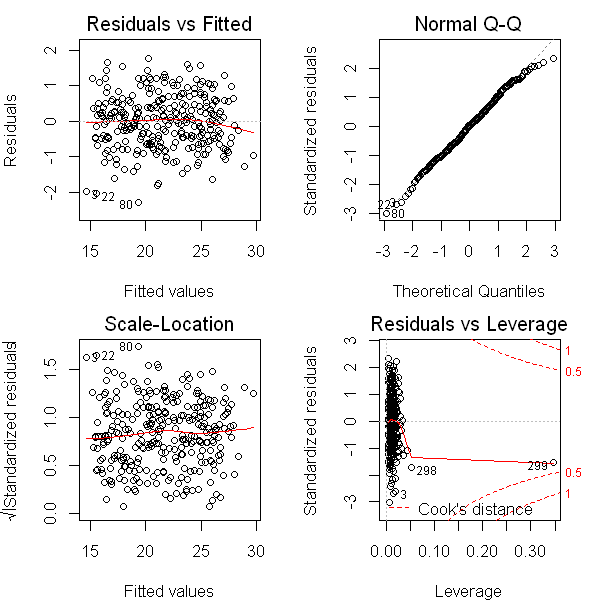

In [141]:
# a "basic" residual analysis
options(repr.plot.width=5, repr.plot.height=5)
par(mfrow=c(2,2), mar=c(4,4,2,2))
plot(model.red)

---